# FINDING RELATIONSHIPS IN DATA WITH PYTHON

## Identify and Visualizing Common Relationships in Data

### Demo: Loading Cleaning and Preparing Data

In [1]:
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
crude_oil_data = pd.read_csv('datasets/U.S._crude_oil_production.csv')

crude_oil_data.head(5)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [3]:
crude_oil_data.tail()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
116,2018-02-01,10248,17,513,14,0,463,428,1704,14,...,54,527,18,4,223,27,0,100,4015,1
117,2018-03-01,10461,17,512,14,0,462,428,1681,16,...,54,543,18,4,231,29,0,104,4185,1
118,2018-04-01,10475,17,497,14,0,465,447,1583,16,...,54,531,19,4,232,29,0,103,4222,1
119,2018-05-01,10443,16,496,14,0,464,447,1504,15,...,58,529,19,3,228,29,0,97,4245,1
120,2018-06-01,10674,16,451,14,0,462,423,1658,15,...,65,526,18,4,226,30,0,94,4410,1


In [4]:
crude_oil_data.shape

(121, 36)

In [5]:
crude_oil_data.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [6]:
crude_oil_data.columns[(crude_oil_data.sum(axis=0)) == 0]

Index(['Arizona', 'Virginia'], dtype='object')

In [7]:
crude_oil_data.drop(['Arizona', 'Virginia'], inplace=True, axis=1)

crude_oil_data.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [8]:
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Month'])

crude_oil_data['Date'].head()

0   2008-06-01
1   2008-07-01
2   2008-08-01
3   2008-09-01
4   2008-10-01
Name: Date, dtype: datetime64[ns]

In [9]:
crude_oil_data.drop('Month', inplace=True, axis=1)

crude_oil_data.columns

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'California',
       'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee', 'Date'],
      dtype='object')

In [10]:
crude_oil_data = crude_oil_data.rename(columns={'Federal Offshore Gulf of Mexico Crude Oil': 'Mexico',
                                                'federal Offshore Pacific Crude Oil': 'Pacific'})

crude_oil_data.columns

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'California',
       'Colorado', 'Mexico', 'Federal Offshore Pacific Crude Oil', 'Florida',
       'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Michigan', 'Mississippi', 'Missouri', 'Nebraska', 'Montana', 'Nevada',
       'New Mexico', 'New York', 'North Dakota', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'South Dakota', 'Wyoming', 'West Virginia', 'Utah',
       'Texas', 'Tennessee', 'Date'],
      dtype='object')

In [11]:
crude_oil_data['Year'] = crude_oil_data['Date'].dt.year

crude_oil_data['Year'].sample(10)

116    2018
51     2012
56     2013
82     2015
64     2013
99     2016
48     2012
28     2010
19     2010
36     2011
Name: Year, dtype: int64

In [12]:
crude_oil_data['Month'] = crude_oil_data['Date'].dt.month

crude_oil_data['Month'].sample(10)

3       9
103     1
28     10
36      6
4      10
61      7
44      2
5      11
82      4
98      8
Name: Month, dtype: int64

In [13]:
crude_oil_data.to_csv('datasets/crude_oil_data_processed.csv', index = False)

In [14]:
crude_oil_data.describe()

,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Federal Offshore Pacific Crude Oil,Florida,Idaho,...,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Year,Month
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,121.000000,121.000000
mean,7423.694215,22.958678,540.404959,16.462810,536.388430,212.115702,1444.264463,43.115702,5.190083,0.066116,...,321.611570,13.876033,4.504132,180.429752,16.471074,85.148760,2403.826446,1.0,2012.958678,6.495868
std,1801.581601,3.773585,73.691879,1.483472,33.228595,117.403165,216.197200,18.735523,1.273539,0.249517,...,119.141958,4.497352,0.564564,34.097367,10.968952,16.662163,1025.413694,0.0,2.950697,3.452352
min,3974.000000,16.000000,398.000000,14.000000,461.000000,81.000000,242.000000,13.000000,2.000000,0.000000,...,152.000000,8.000000,3.000000,137.000000,3.000000,59.000000,1055.000000,1.0,2008.000000,1.000000
25%,5555.000000,20.000000,497.000000,15.000000,534.000000,97.000000,1322.000000,18.000000,5.000000,0.000000,...,201.000000,9.000000,4.000000,147.000000,6.000000,71.000000,1243.000000,1.0,2010.000000,4.000000
50%,7355.000000,22.000000,523.000000,16.000000,544.000000,169.000000,1452.000000,51.000000,6.000000,0.000000,...,320.000000,13.000000,5.000000,174.000000,20.000000,85.000000,2533.000000,1.0,2013.000000,6.000000
75%,9085.000000,26.000000,582.000000,18.000000,559.000000,320.000000,1593.000000,56.000000,6.000000,0.000000,...,433.000000,18.000000,5.000000,209.000000,25.000000,97.000000,3301.000000,1.0,2015.000000,9.000000
max,10674.000000,29.000000,728.000000,19.000000,588.000000,447.000000,1775.000000,70.000000,7.000000,1.000000,...,543.000000,22.000000,5.000000,251.000000,39.000000,116.000000,4410.000000,1.0,2018.000000,12.000000


### Demo: Exploring and Visualizing Relationships

In [15]:
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt

In [16]:
crude_oil_data = pd.read_csv('datasets/crude_oil_data_processed.csv')

crude_oil_data.head(5)

,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Federal Offshore Pacific Crude Oil,Florida,Idaho,...,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Date,Year,Month
0,5138,21,655,17,583,82,1326,67,5,0,...,8,5,144,6,60,1097,1,2008-06-01,2008,6
1,5177,21,640,17,586,81,1372,61,6,0,...,8,5,145,5,61,1111,1,2008-07-01,2008,7
2,5003,21,544,17,588,82,1272,70,5,0,...,8,5,145,6,62,1110,1,2008-08-01,2008,8
3,3974,21,681,16,587,88,242,67,5,0,...,8,5,144,6,63,1055,1,2008-09-01,2008,9
4,4738,21,716,17,586,86,803,66,6,0,...,8,5,145,6,64,1125,1,2008-10-01,2008,10


In [17]:
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Date'])

crude_oil_data['Date'].head()

0   2008-06-01
1   2008-07-01
2   2008-08-01
3   2008-09-01
4   2008-10-01
Name: Date, dtype: datetime64[ns]

Text(0.5, 1.0, 'U.S. Crude Oil Production')

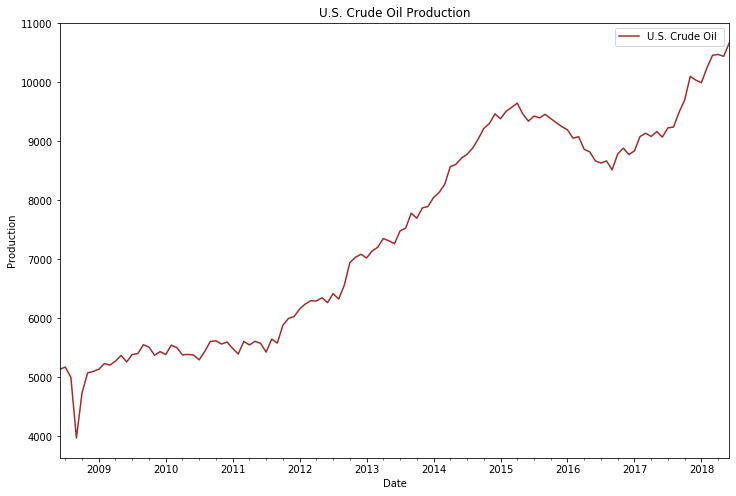

In [18]:
crude_oil_data.plot(x='Date', y='U.S. Crude Oil ',
                    figsize=(12, 8), color='brown')

plt.ylabel('Production')
plt.title('U.S. Crude Oil Production')

Text(0.5, 1.0, 'U.S. Crude Oil Production')

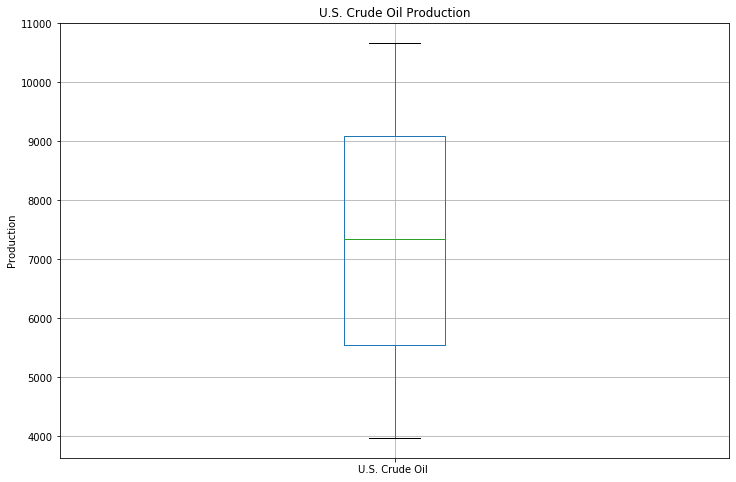

In [19]:
crude_oil_data.boxplot('U.S. Crude Oil ',figsize=(12, 8))

plt.ylabel('Production')
plt.title('U.S. Crude Oil Production')

Text(0.5, 1.0, 'California Crude Oil Production')

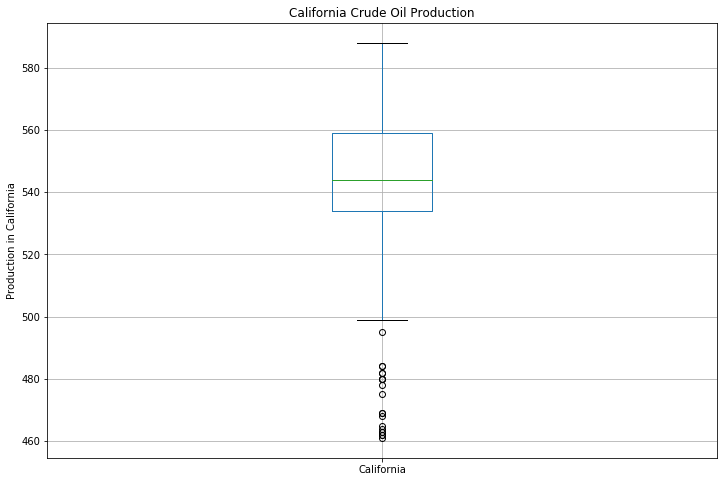

In [20]:
crude_oil_data[['California']].boxplot(figsize=(12, 8))

plt.ylabel('Production in California')
plt.title('California Crude Oil Production')

Text(0.5, 1.0, 'Alaska, California Crude Oil Production')

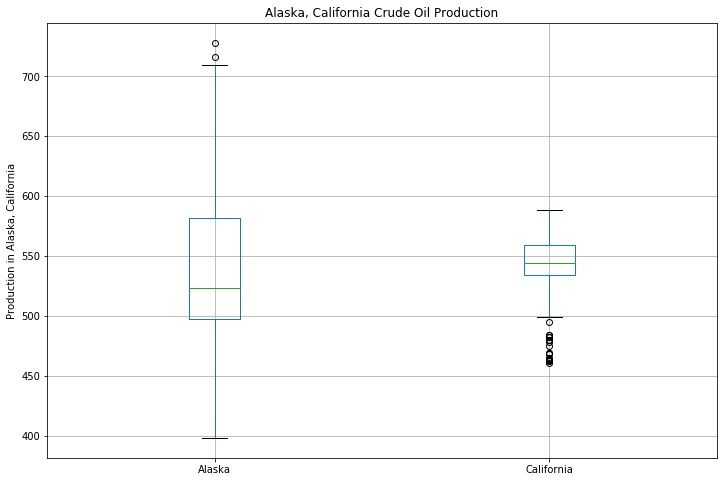

In [21]:
crude_oil_data[['Alaska', 'California']].boxplot(figsize=(12, 8))

plt.ylabel('Production in Alaska, California')
plt.title('Alaska, California Crude Oil Production')

Text(0, 0.5, 'Production')

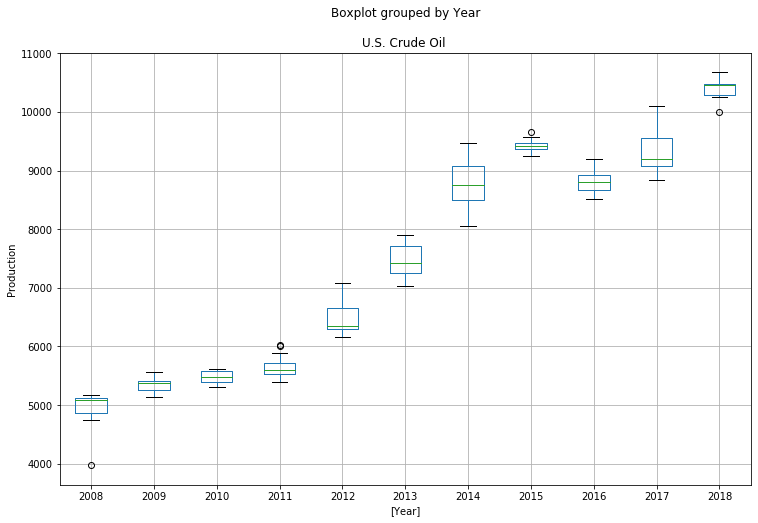

In [22]:
crude_oil_data.boxplot(column=['U.S. Crude Oil '], by=['Year'],
                       figsize=(12, 8))

plt.ylabel('Production')

In [23]:
year_data = crude_oil_data.groupby('Year', as_index=False).sum()

year_data[['Year', 'U.S. Crude Oil ']]

,Year,U.S. Crude Oil
0,2008,34211
1,2009,64180
2,2010,65741
3,2011,67829
4,2012,78007
5,2013,89585
6,2014,105064
7,2015,113179
8,2016,105970
9,2017,112205


Text(0.5, 1.0, 'U.S Crude Oil Production')

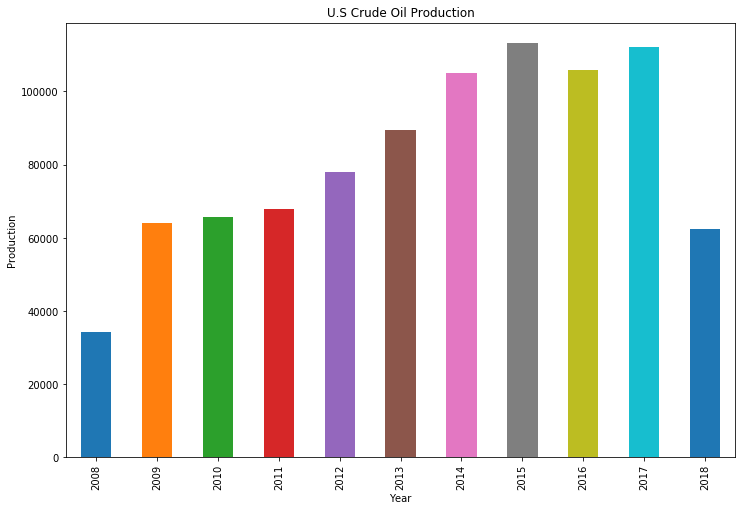

In [24]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

year_data.plot.bar(x='Year', y='U.S. Crude Oil ' ,
                   figsize=(12, 8), color=colors,
                   legend=False)

plt.ylabel('Production')
plt.title('U.S Crude Oil Production')

In [25]:
mean_prod_data = crude_oil_data.mean()[1:-3]

mean_prod_data

Alabama                                 22.958678
Alaska                                 540.404959
Arkansas                                16.462810
California                             536.388430
Colorado                               212.115702
Mexico                                1444.264463
Federal Offshore Pacific Crude Oil      43.115702
Florida                                  5.190083
Idaho                                    0.066116
Illinois                                25.008264
Indiana                                  5.619835
Kansas                                 114.520661
Kentucky                                 7.041322
Louisiana                              177.404959
Michigan                                18.016529
Mississippi                             62.355372
Missouri                                 0.223140
Nebraska                                 6.966942
Montana                                 71.537190
Nevada                                   1.000000


In [26]:
mean_prod_data = mean_prod_data.sort_values(ascending=False)

mean_prod_data

Texas                                 2403.826446
Mexico                                1444.264463
North Dakota                           746.380165
Alaska                                 540.404959
California                             536.388430
Oklahoma                               321.611570
New Mexico                             305.495868
Colorado                               212.115702
Wyoming                                180.429752
Louisiana                              177.404959
Kansas                                 114.520661
Utah                                    85.148760
Montana                                 71.537190
Mississippi                             62.355372
Federal Offshore Pacific Crude Oil      43.115702
Ohio                                    33.322314
Illinois                                25.008264
Alabama                                 22.958678
Michigan                                18.016529
West Virginia                           16.471074


In [27]:
mean_prod_df = pd.DataFrame(mean_prod_data).reset_index()

mean_prod_df.columns = ['State', 'Production']

mean_prod_df.head(10)

,State,Production
0,Texas,2403.826446
1,Mexico,1444.264463
2,North Dakota,746.380165
3,Alaska,540.404959
4,California,536.388430
5,Oklahoma,321.611570
6,New Mexico,305.495868
7,Colorado,212.115702
8,Wyoming,180.429752
9,Louisiana,177.404959


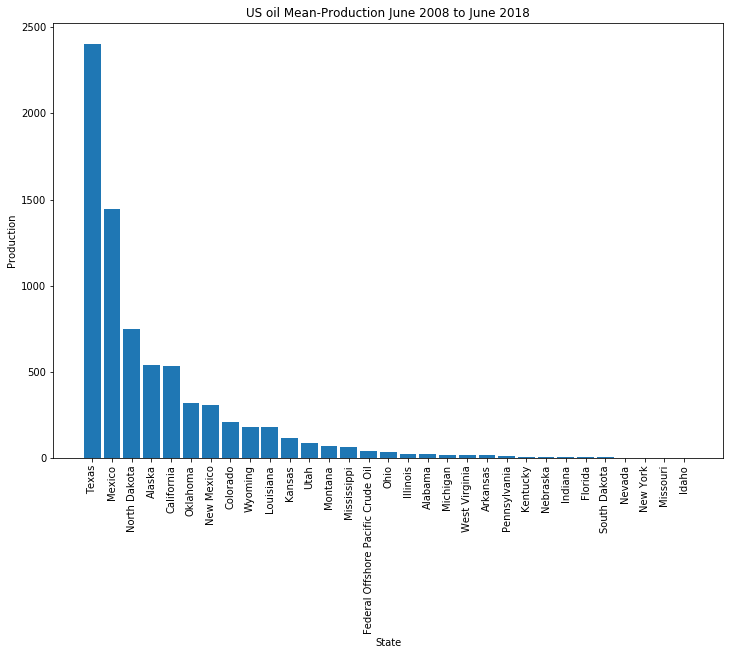

In [28]:
plt.figure(figsize=(12, 8))

plt.bar(mean_prod_df['State'], mean_prod_df['Production'],
        width=0.85)

plt.title('US oil Mean-Production June 2008 to June 2018')

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Production')

plt.show()

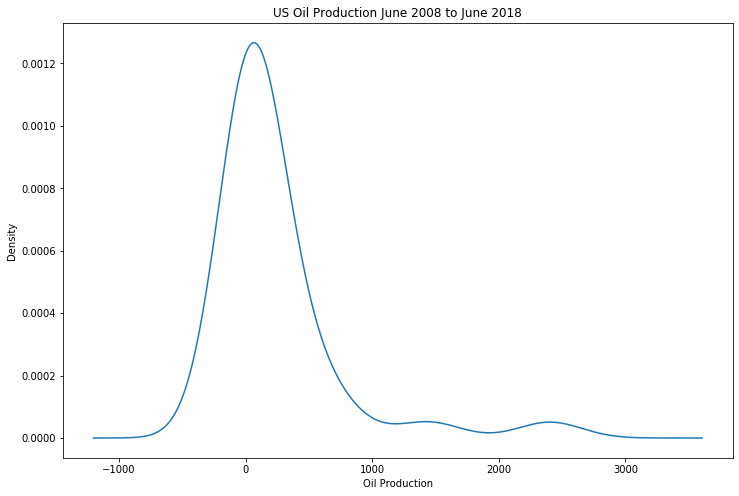

In [29]:
mean_prod_df['Production'].plot.kde(figsize=(12, 8))

plt.title('US Oil Production June 2008 to June 2018')
plt.xlabel('Oil Production')

plt.show()

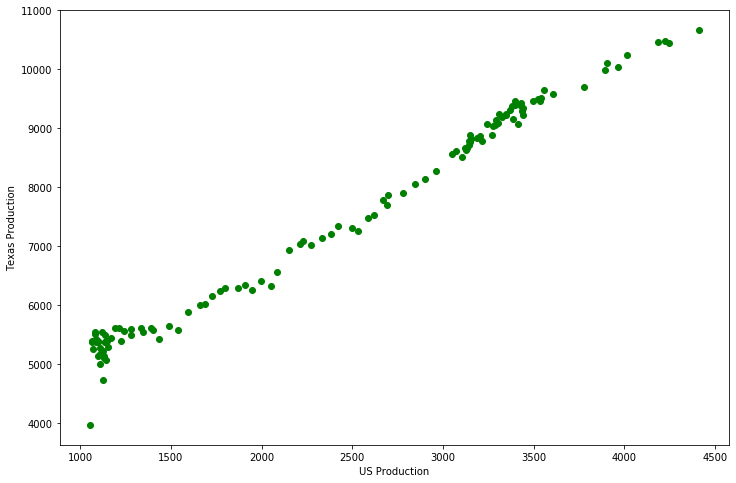

In [30]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data['Texas'], crude_oil_data['U.S. Crude Oil '], c='g')

plt.xlabel('US Production')
plt.ylabel('Texas Production')

plt.show()

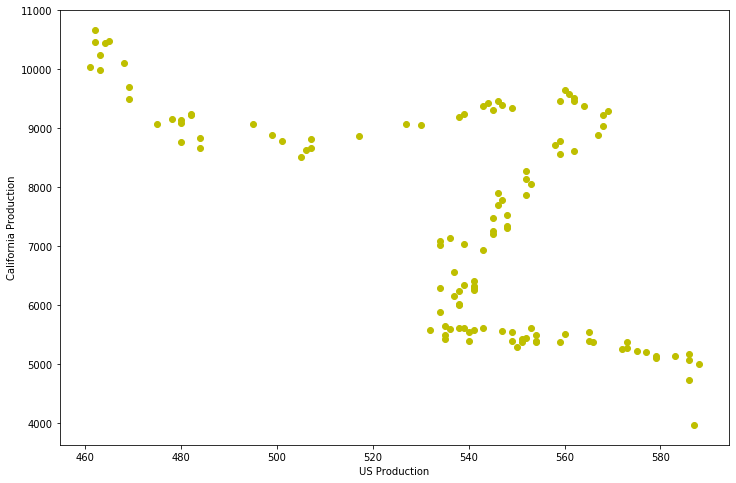

In [31]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data['California'], crude_oil_data['U.S. Crude Oil '], c='y')

plt.xlabel('US Production')
plt.ylabel('California Production')

plt.show()

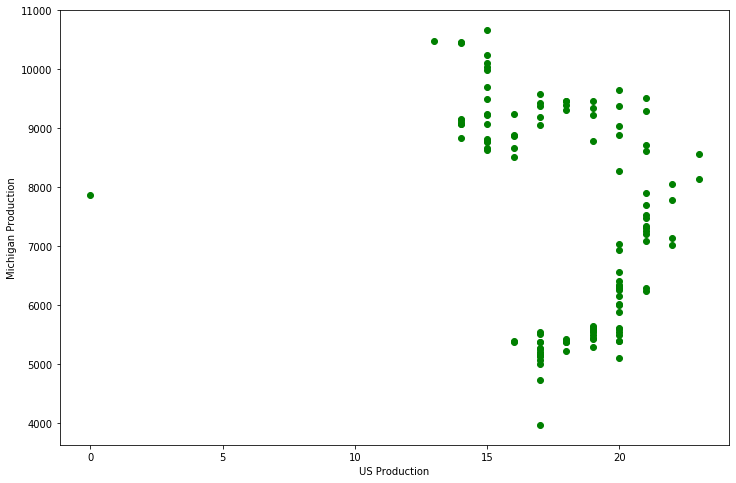

In [32]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data['Michigan'], crude_oil_data['U.S. Crude Oil '], c='g')

plt.xlabel('US Production')
plt.ylabel('Michigan Production')

plt.show()

### Calculating and Visualizing Correlations

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

In [34]:
bikesharing_data = pd.read_csv('datasets/bike_sharing_daily.csv', index_col=0)

bikesharing_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:
bikesharing_data.shape

(731, 15)

In [36]:
bikesharing_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [37]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

In [38]:
np.corrcoef(bikesharing_data['temp'],
            bikesharing_data['cnt'])

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

In [39]:
bikesharing_data['temp'].corr(bikesharing_data['cnt'])

0.6274940090334918

In [40]:
pearsonr(bikesharing_data['temp'],
         bikesharing_data['cnt'])

(0.627494009033492, 2.8106223975907754e-81)

In [41]:
spearmanr(bikesharing_data['temp'],
          bikesharing_data['cnt'])

SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

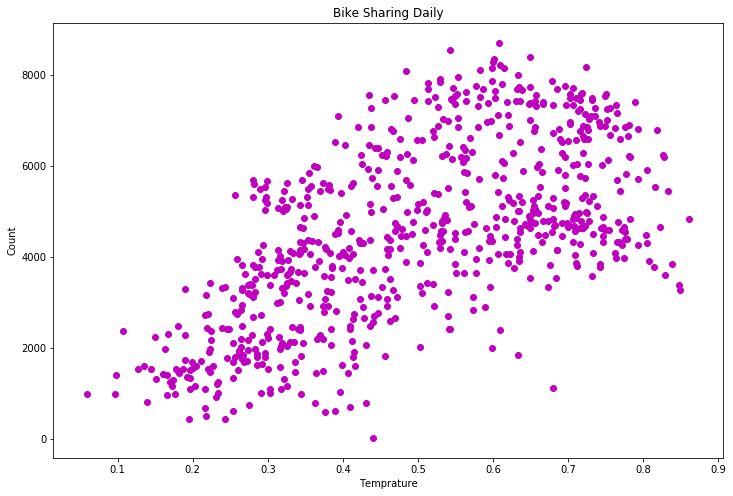

In [42]:
plt.figure(figsize=(12, 8))

plt.scatter(bikesharing_data['temp'],
            bikesharing_data['cnt'], color='m')

plt.title('Bike Sharing Daily')

plt.xlabel('Temprature')
plt.ylabel('Count')

plt.show()

In [43]:
np.corrcoef(bikesharing_data['workingday'],
           bikesharing_data['registered'])

array([[1.        , 0.30390712],
       [0.30390712, 1.        ]])

In [44]:
bikesharing_data['workingday'].corr(bikesharing_data['registered'])

0.3039071170459171

In [45]:
pearsonr(bikesharing_data['workingday'],
         bikesharing_data['registered'])

(0.30390711704591733, 4.3815710893705565e-17)

In [46]:
spearmanr(bikesharing_data['workingday'],
         bikesharing_data['registered'])

SpearmanrResult(correlation=0.3058584564758216, pvalue=2.6994118569378256e-17)

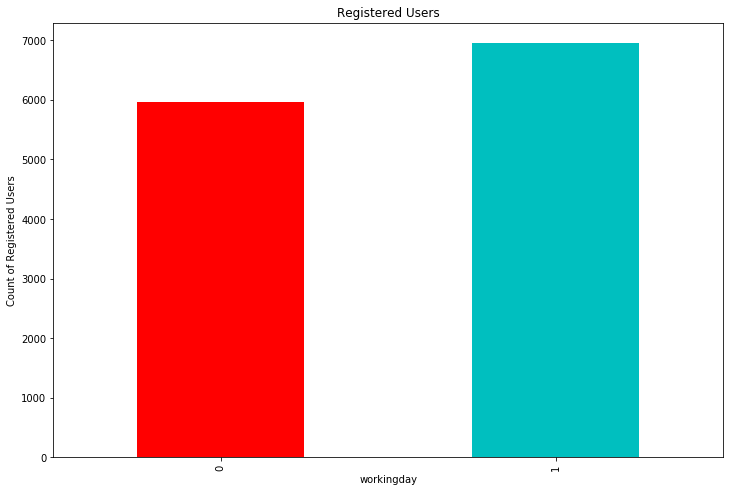

In [47]:
ax = plt.subplot()

bikesharing_data.groupby('workingday').max()['registered'].plot(kind='bar',
                                                                figsize=(12, 8),
                                                                ax = ax,
                                                                color=['r', 'c'])

plt.title('Registered Users')
plt.ylabel('Count of Registered Users')

plt.show()

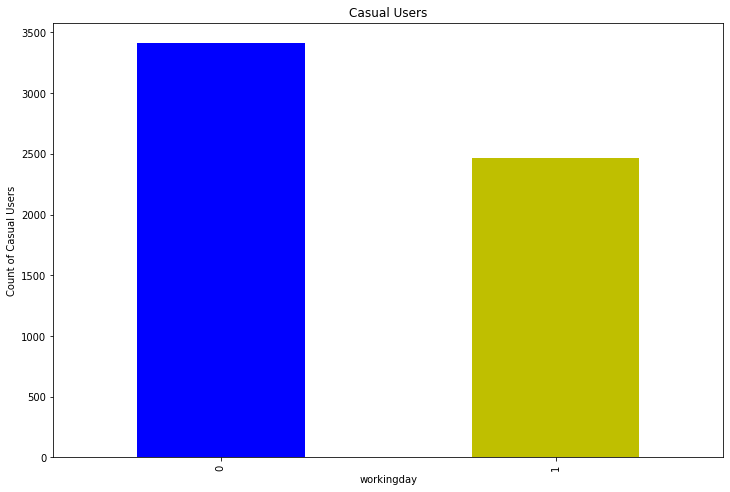

In [48]:
ax = plt.subplot()

bikesharing_data.groupby('workingday').max()['casual'].plot(kind='bar',
                                                                figsize=(12, 8),
                                                                ax = ax,
                                                                color=['b', 'y'])

plt.title('Casual Users')
plt.ylabel('Count of Casual Users')

plt.show()

In [49]:
np.corrcoef(bikesharing_data['windspeed'],
            bikesharing_data['cnt'])

array([[ 1.      , -0.234545],
       [-0.234545,  1.      ]])

In [50]:
bikesharing_data['windspeed'].corr(bikesharing_data['cnt'])

-0.23454499742167

In [51]:
pearsonr(bikesharing_data['windspeed'],
            bikesharing_data['cnt'])

(-0.23454499742167, 1.3599586778869642e-10)

In [52]:
spearmanr(bikesharing_data['windspeed'],
            bikesharing_data['cnt'])

SpearmanrResult(correlation=-0.21719701027268842, pvalue=2.9694272867448183e-09)

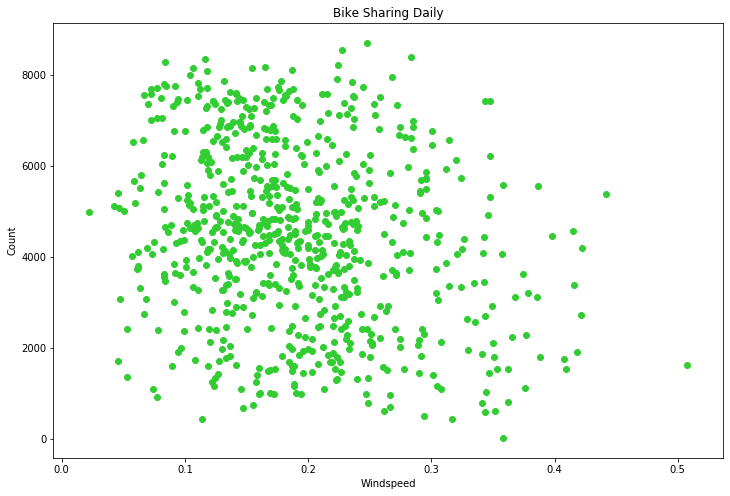

In [53]:
plt.figure(figsize=(12, 8))

plt.scatter(bikesharing_data['windspeed'],
            bikesharing_data['cnt'], color='limegreen')

plt.title('Bike Sharing Daily')
plt.ylabel('Count')
plt.xlabel('Windspeed')

plt.show()

In [54]:
bikesharing_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


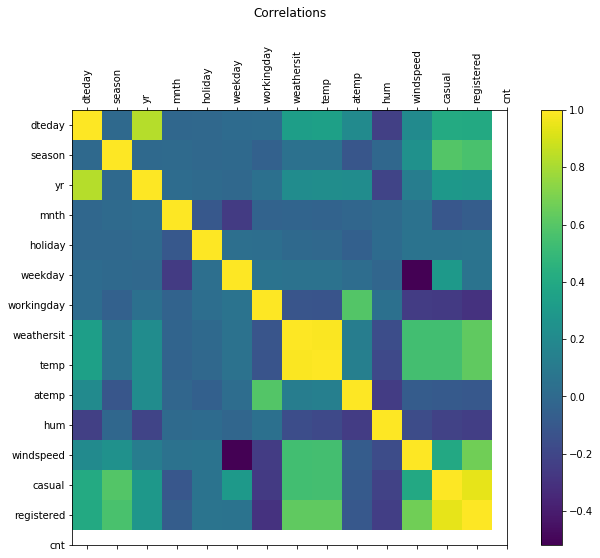

In [55]:
plt.figure(figsize=(12, 8))

plt.matshow(bikesharing_data.corr(),
            fignum=False,
            aspect='equal')

columns = len(bikesharing_data.columns)

plt.xticks(range(columns), bikesharing_data.columns)
plt.yticks(range(columns), bikesharing_data.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlations', y=1.2)

plt.show()

In [56]:
target = bikesharing_data['cnt']

features = bikesharing_data.drop(['casual', 'registered', 'cnt', 'dteday'], axis=1)

In [57]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

feature_names

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


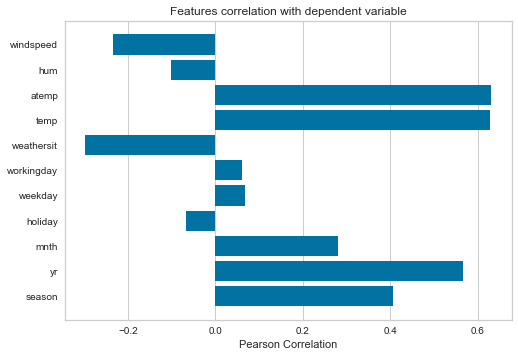

In [58]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(features, target)

visualizer.poof()

### Calculating and Visualizing Autocorrelation

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
bikesharing_data = pd.read_csv('datasets/bike_sharing_hourly.csv', index_col=0)

bikesharing_data.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


In [61]:
bikesharing_data[['temp', 'hum']].describe()

,temp,hum
count,17379.000000,17379.000000
mean,0.496987,0.627229
std,0.192556,0.192930
min,0.020000,0.000000
25%,0.340000,0.480000
50%,0.500000,0.630000
75%,0.660000,0.780000
max,1.000000,1.000000


In [62]:
bikesharing_data[['temp', 'hum']].corr()

,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [63]:
bikesharing_data['temp'].autocorr(lag=2)

0.980684914901323

In [64]:
bikesharing_data['temp'].autocorr(lag=12)

0.8250709628213121

In [65]:
bikesharing_data['temp'].autocorr(lag=102)

0.7658269022298079

In [66]:
bikesharing_data['temp'].autocorr(lag=1002)

0.5654240428575001

In [67]:
bikesharing_data['hum'].autocorr(lag=12)

0.20088188422738348

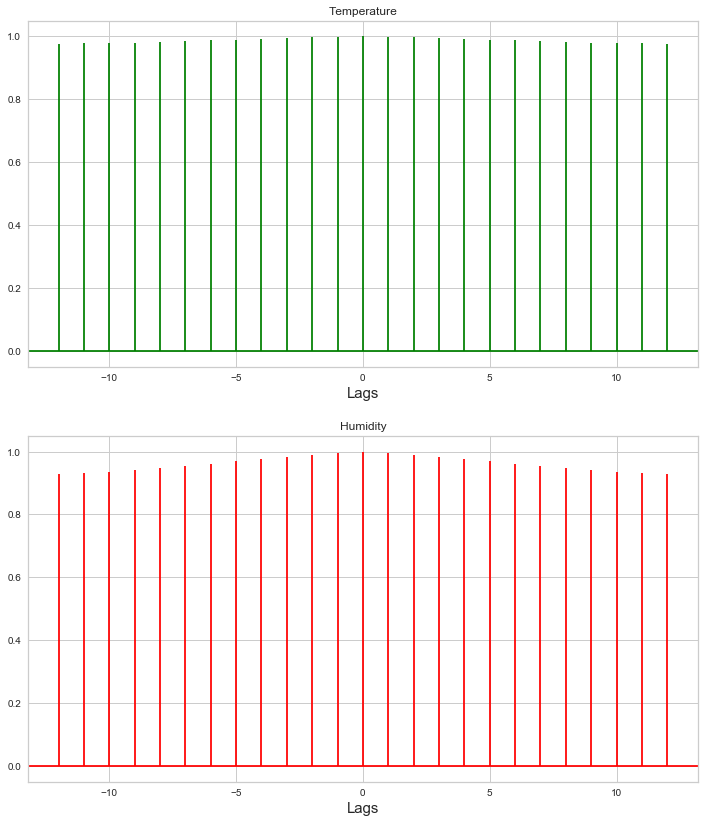

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

ax1.acorr(bikesharing_data['temp'],
          maxlags=12, color='green')

ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize=15)

ax2.acorr(bikesharing_data['hum'],
          maxlags=12, color='red')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=15)

plt.show()

In [69]:
bikesharing_data['temp'].autocorr(lag=24)

0.9148730709671985

In [70]:
bikesharing_data['hum'].autocorr(lag=24)

0.4948813054393592

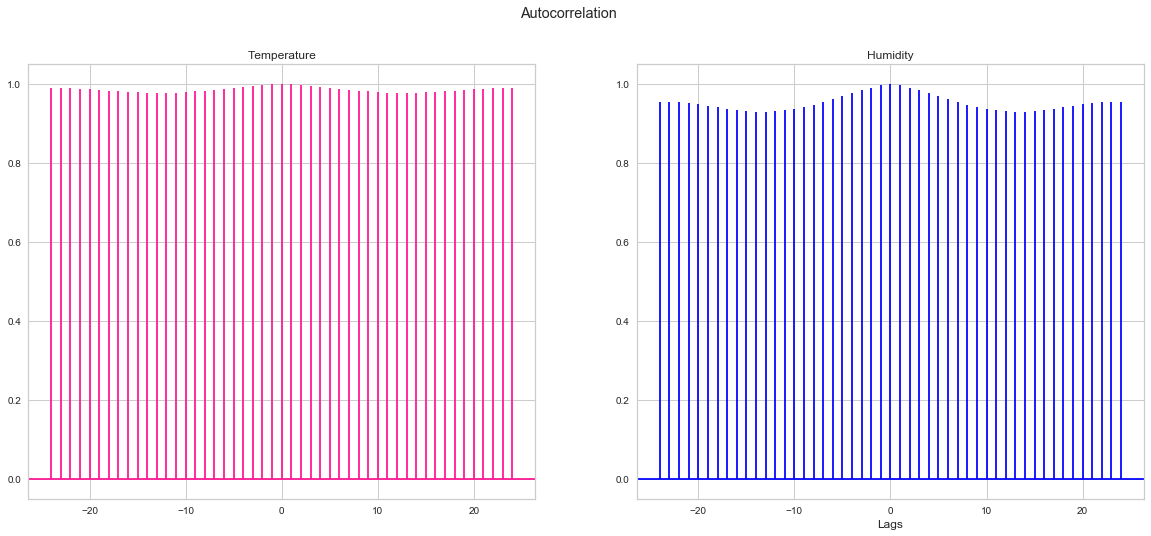

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.acorr(bikesharing_data['temp'],
          maxlags=24, color='deeppink')

ax1.title.set_text('Temperature')
ax2.set_xlabel("Lags", fontsize=12)

ax2.acorr(bikesharing_data['hum'],
          maxlags=24, color='blue')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=12)

plt.suptitle('Autocorrelation')

plt.show()

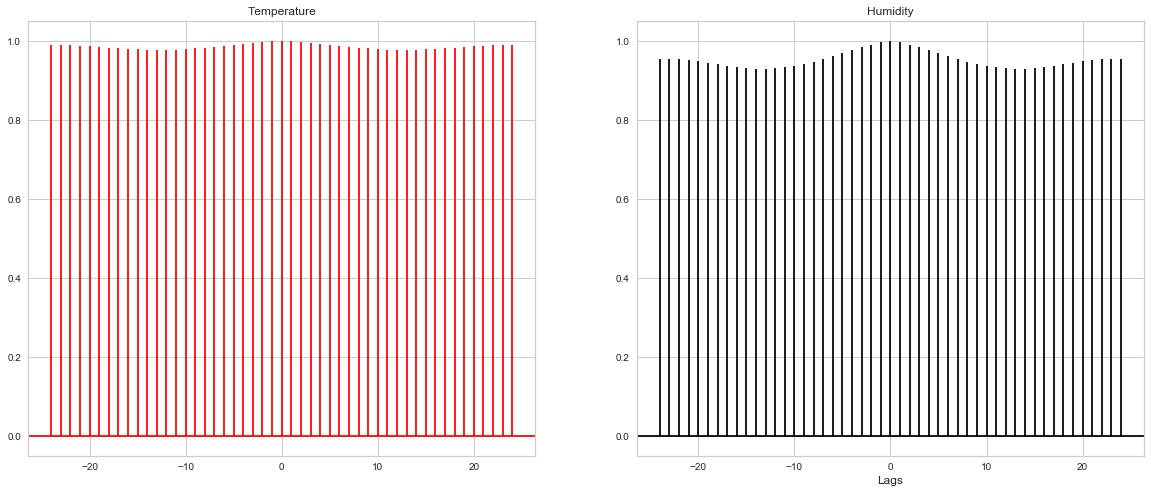

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.acorr(bikesharing_data['temp'],
          maxlags=24, color='red')

ax1.title.set_text('Temperature')
ax2.set_xlabel("Lags", fontsize=12)

ax2.acorr(bikesharing_data['hum'],
          maxlags=24, color='black')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=12)


plt.show()

### Line Plots and Bar Graphs

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [74]:
bikesharing_data = pd.read_csv('datasets/bike_sharing_daily.csv', index_col=0)

bikesharing_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [75]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

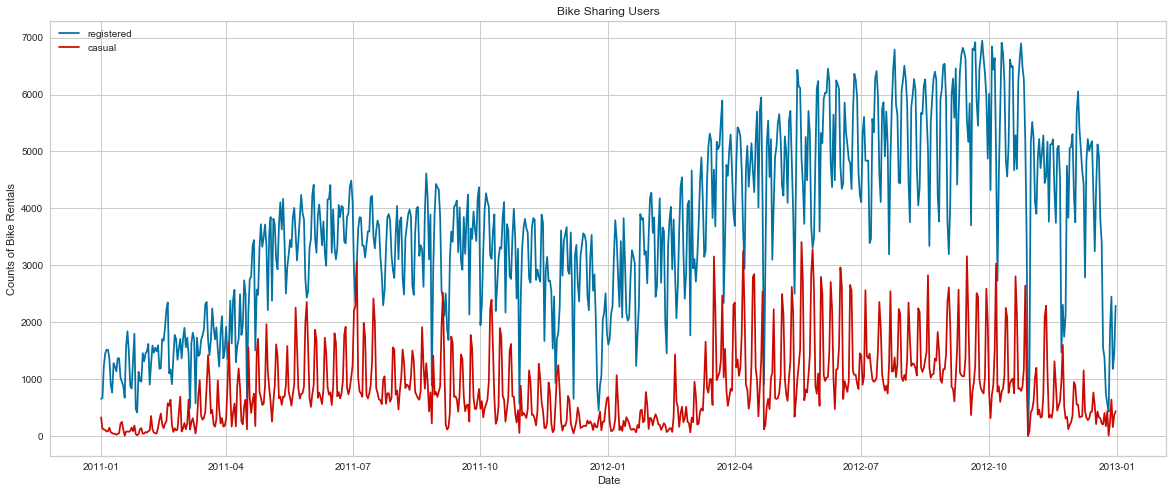

In [76]:
plt.figure(figsize=(20, 8))

plt.plot(bikesharing_data['dteday'],
         bikesharing_data['registered'],
         color='b',
         label= 'registered')

plt.plot(bikesharing_data['dteday'],
         bikesharing_data['casual'],
         color='r',
         label='casual')

plt.legend(loc='upper left')

plt.title('Bike Sharing Users')
plt.xlabel('Date')
plt.ylabel('Counts of Bike Rentals')

plt.show()

In [77]:
year_df = bikesharing_data.groupby('yr', as_index=False).mean()

year_df[['yr', 'cnt']]

,yr,cnt
0,0,3405.761644
1,1,5599.934426


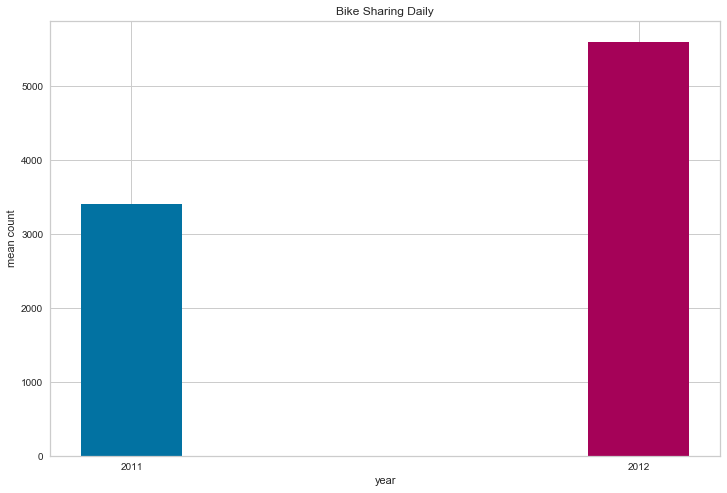

In [78]:
plt.figure(figsize=(12, 8))

colors = ['b', 'm']

plt.bar(year_df['yr'], year_df['cnt'],
        width=0.2, color=colors)

plt.xticks([0, 1], ['2011', '2012'])

plt.title('Bike Sharing Daily')
plt.xlabel('year')
plt.ylabel('mean count')

plt.show()

In [79]:
days = bikesharing_data.groupby('workingday', as_index=False).mean()

days[['cnt']]

,cnt
0,4330.168831
1,4584.820000


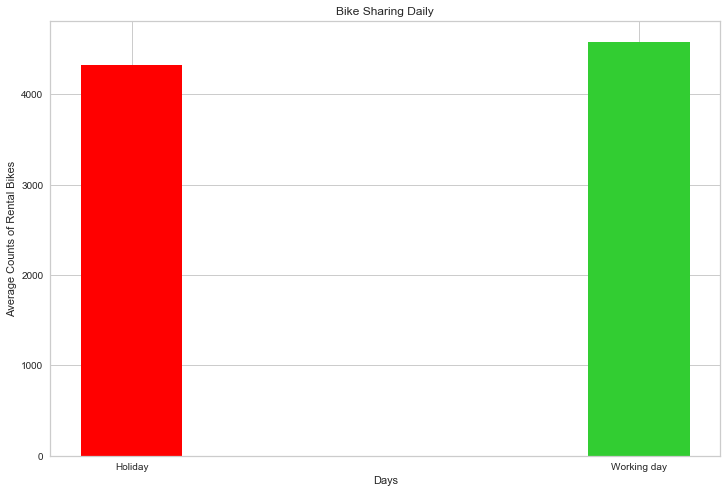

In [80]:
plt.figure(figsize=(12, 8))

plt.bar(days['workingday'],
        days['cnt'],
        width=0.2,
        color=['red', 'limegreen'])

plt.xticks([0, 1], ['Holiday', 'Working day'])

plt.title('Bike Sharing Daily')
plt.xlabel('Days')
plt.ylabel('Average Counts of Rental Bikes')
plt.show()

In [81]:
year_data = bikesharing_data.loc[bikesharing_data['yr'] == 1]

year_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [82]:
month_df = year_data[['mnth', 'cnt']].groupby('mnth', as_index=False).mean()

month_df

,mnth,cnt
0,1,3120.774194
1,2,3556.448276
2,3,5318.548387
3,4,5807.466667
4,5,6318.225806
5,6,6761.000000
6,7,6567.967742
7,8,6919.451613
8,9,7285.766667
9,10,6414.225806


In [83]:
month_df['mnth'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                          inplace=True)

month_df

,mnth,cnt
0,Jan,3120.774194
1,Feb,3556.448276
2,Mar,5318.548387
3,Apr,5807.466667
4,May,6318.225806
5,Jun,6761.000000
6,Jul,6567.967742
7,Aug,6919.451613
8,Sep,7285.766667
9,Oct,6414.225806


Text(0, 0.5, 'Average Counts of Bike Rentals')

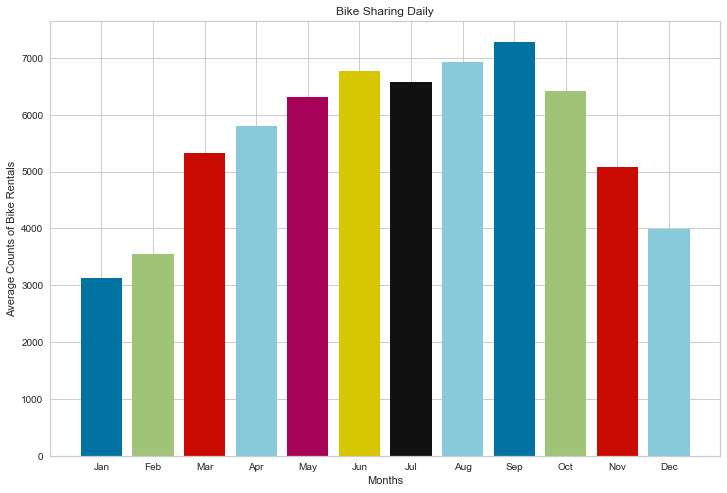

In [84]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'c']

plt.figure(figsize=(12, 8))

plt.bar(month_df['mnth'], month_df['cnt'], color=colors)

plt.title('Bike Sharing Daily')
plt.xlabel('Months')
plt.ylabel('Average Counts of Bike Rentals')

### Box Plots Violin Plots and Pie Charts

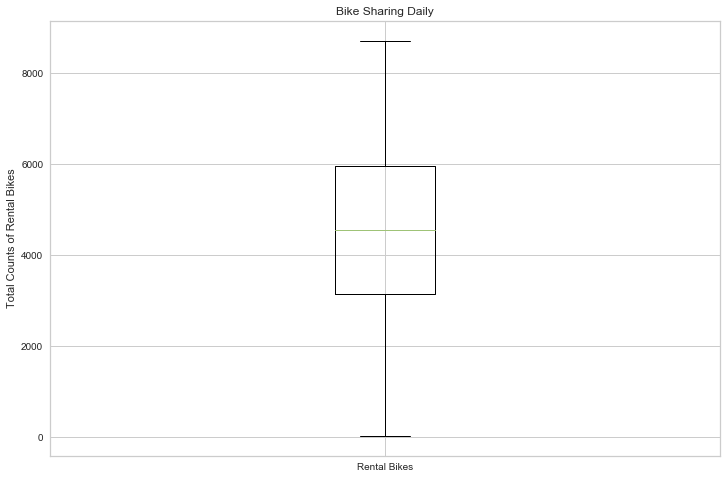

In [85]:
plt.figure(figsize=(12, 8))

plt.boxplot(bikesharing_data['cnt'])

plt.xticks([1], ['Rental Bikes'])
plt.title('Bike Sharing Daily')
plt.ylabel('Total Counts of Rental Bikes')

plt.show()

In [86]:
selected_bike_data = bikesharing_data[['casual', 'registered']]

selected_bike_data.head()

,casual,registered
instant,,
1,331,654
2,131,670
3,120,1229
4,108,1454
5,82,1518


In [87]:
columns = selected_bike_data.columns

columns

Index(['casual', 'registered'], dtype='object')

In [88]:
bike_data_array = selected_bike_data.values

bike_data_array


array([[ 331,  654],
       [ 131,  670],
       [ 120, 1229],
       ...,
       [ 159, 1182],
       [ 364, 1432],
       [ 439, 2290]], dtype=int64)

In [89]:
colors = ['g', 'm']

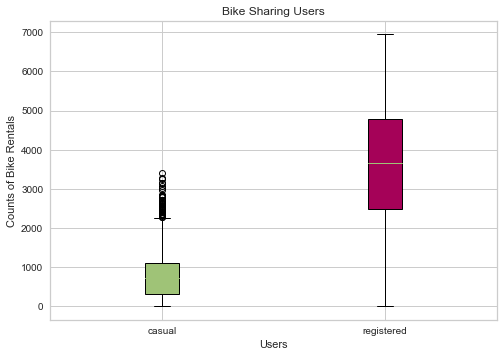

In [90]:
bp = plt.boxplot(bike_data_array,
                 patch_artist=True,
                 labels=columns)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Counts of Bike Rentals')

plt.show()

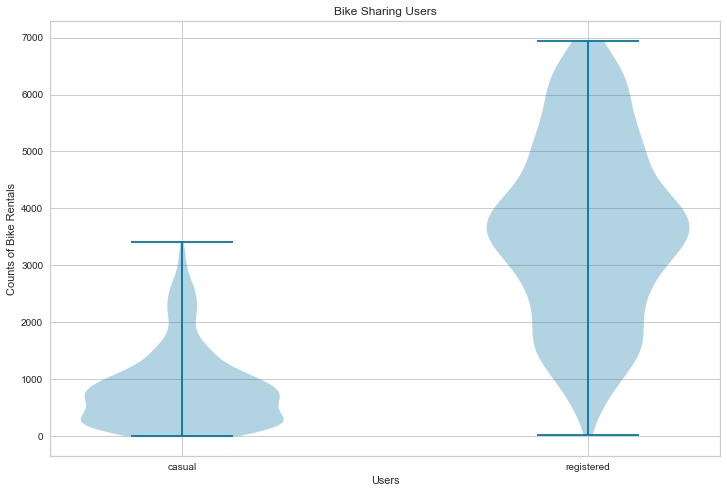

In [91]:
plt.figure(figsize=(12, 8))

vp = plt.violinplot(bike_data_array)

plt.xticks([1, 2], columns)

plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Counts of Bike Rentals')

plt.show()

In [92]:
season_data = bikesharing_data[['season', 'cnt']]

season_data.sample(5)

,season,cnt
instant,,
511,2,6734
597,3,4549
356,1,3068
274,4,2429
659,4,8090


In [93]:
grouped_data = season_data.groupby('season', as_index=False).sum()

grouped_data.head()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [94]:
grouped_data['season'].replace([1, 2, 3, 4],
                               ['spring', 'summer', 'fall', 'winter'],
                               inplace=True)

grouped_data

,season,cnt
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


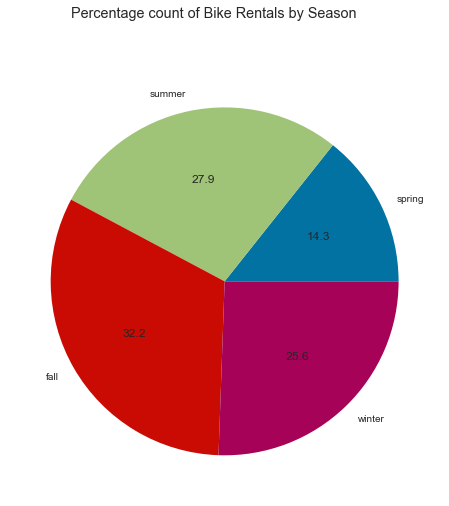

In [95]:
plt.figure(figsize=(12, 8))

plt.pie(grouped_data['cnt'],
       labels=grouped_data['season'],
       autopct='%.1f')

plt.suptitle('Percentage count of Bike Rentals by Season')

plt.show()

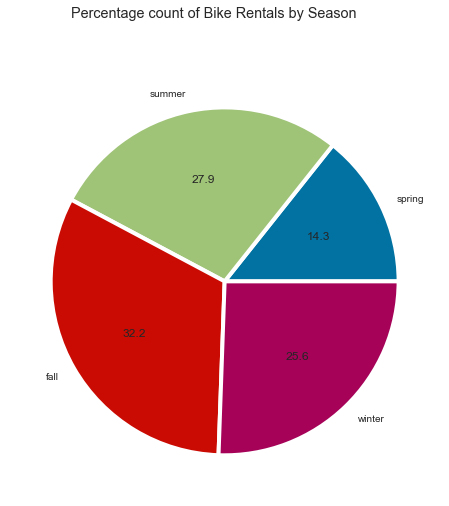

In [96]:
plt.figure(figsize=(12, 8))

plt.pie(grouped_data['cnt'],
       labels=grouped_data['season'],
       autopct='%.1f',
       wedgeprops= {'linewidth' : 4,
                    'edgecolor' : 'white'})

plt.suptitle('Percentage count of Bike Rentals by Season')

plt.show()

In [97]:
explode_max = (0, 0, 0.2, 0)

explode_min = (0.2, 0, 0, 0)

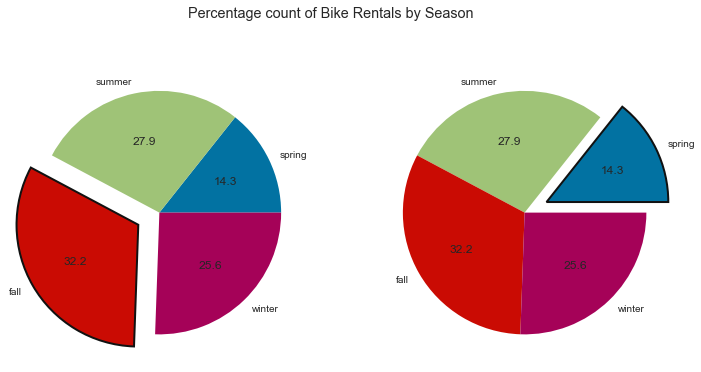

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

wedges, texts, autotexts = ax1.pie(grouped_data['cnt'],
                                   labels=grouped_data['season'],
                                   autopct='%.1f',
                                   explode=explode_max)

wedges[2].set(edgecolor='k', linewidth=2)

wedges, texts, autotexts = ax2.pie(grouped_data['cnt'],
                                   labels=grouped_data['season'],
                                   autopct='%.1f',
                                   explode=explode_min)

wedges[0].set(edgecolor='k', linewidth=2)

plt.suptitle('Percentage count of Bike Rentals by Season')

plt.show()

### Histograms, KDE Plots, Rug Plots

In [99]:
import seaborn as sns

sns.__version__

'0.10.0'

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
automobile_data = pd.read_csv('datasets/Automobile_data.csv',
                              na_values = '?')

automobile_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [102]:
automobile_data.shape

(205, 26)

In [103]:
automobile_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [104]:
automobile_data.dropna(inplace=True)

automobile_data.shape

(159, 26)

In [105]:
automobile_data.to_csv('datasets/automobile_data_processed.csv', index = False)

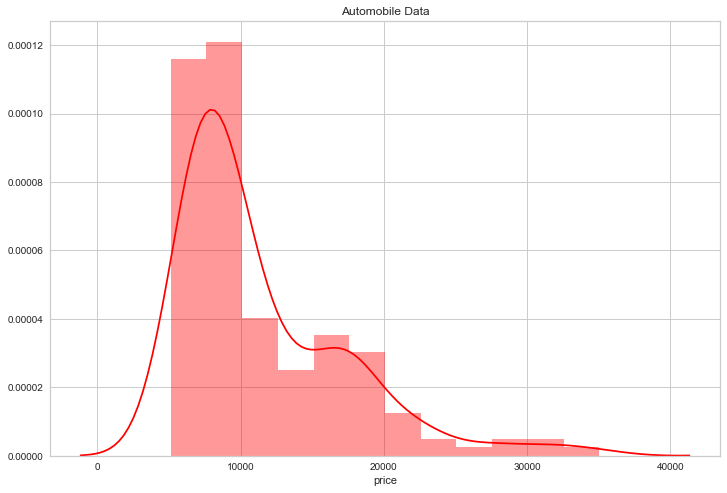

In [106]:
plt.figure(figsize=(12, 8))

sns.distplot(automobile_data['price'],
            color='red')

plt.title('Automobile Data')

plt.show()

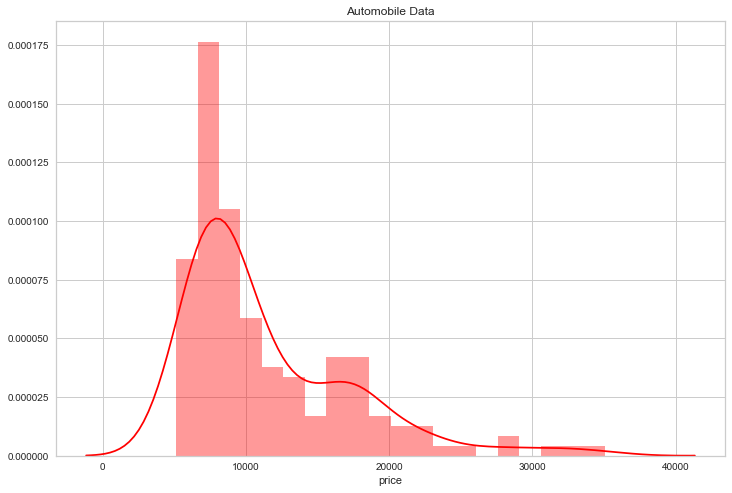

In [107]:
plt.figure(figsize=(12, 8))

sns.distplot(automobile_data['price'],
            bins=20, color='red')

plt.title('Automobile Data')

plt.show()

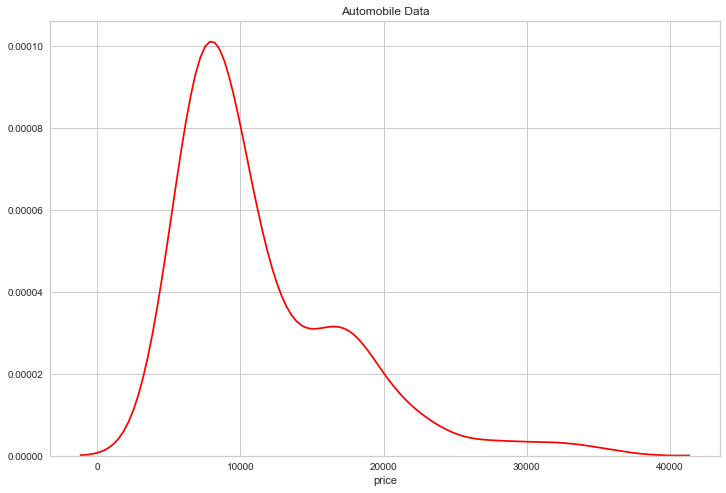

In [108]:
plt.figure(figsize=(12, 8))

sns.distplot(automobile_data['price'],
            hist=False, color='red')

plt.title('Automobile Data')

plt.show()

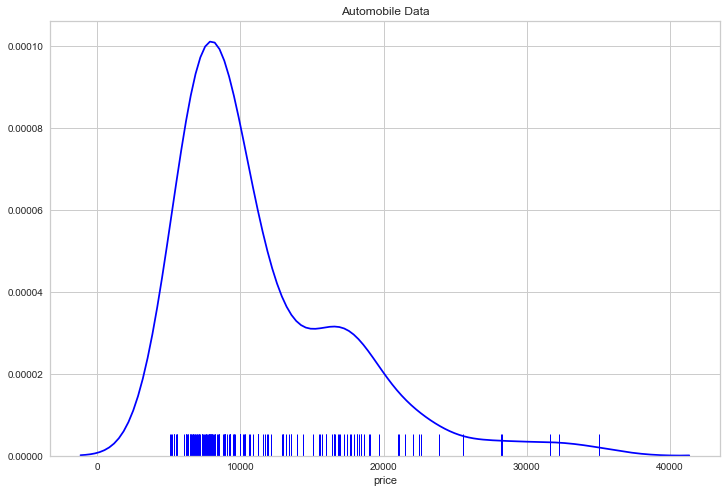

In [109]:
plt.figure(figsize=(12, 8))

sns.distplot(automobile_data['price'],
            hist=False, rug=True, color='blue')

plt.title('Automobile Data')

plt.show()

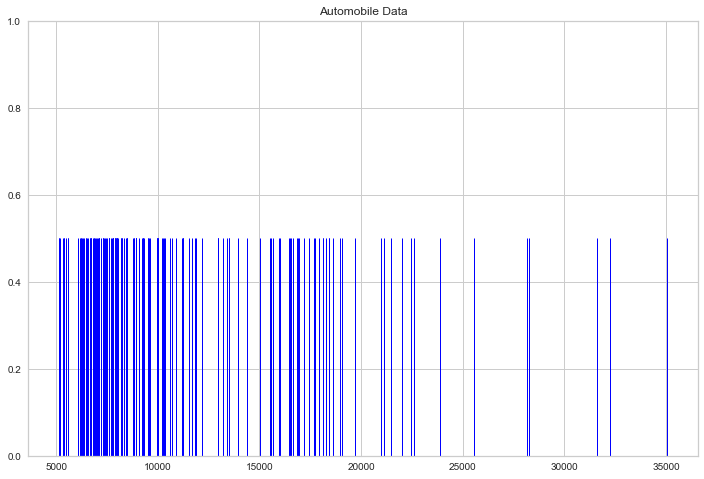

In [110]:
plt.figure(figsize=(12, 8))

sns.rugplot(automobile_data['price'],
            height=0.5, color='blue')

plt.title('Automobile Data')

plt.show()

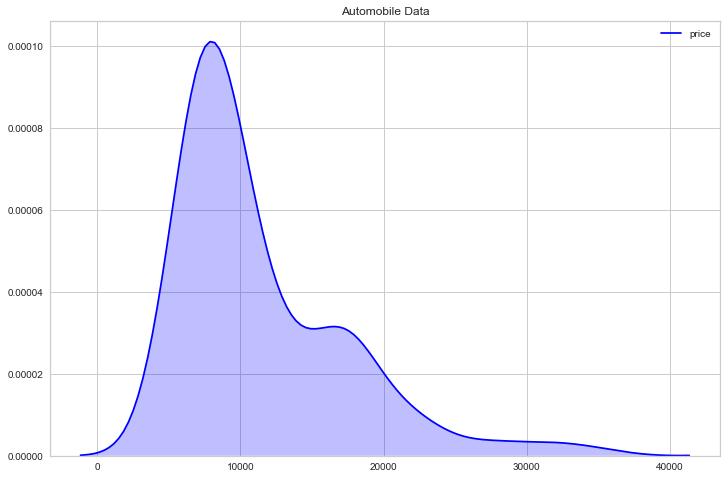

In [111]:
plt.figure(figsize=(12, 8))

sns.kdeplot(automobile_data['price'],
            shade=True, color='blue')

plt.title('Automobile Data')

plt.show()

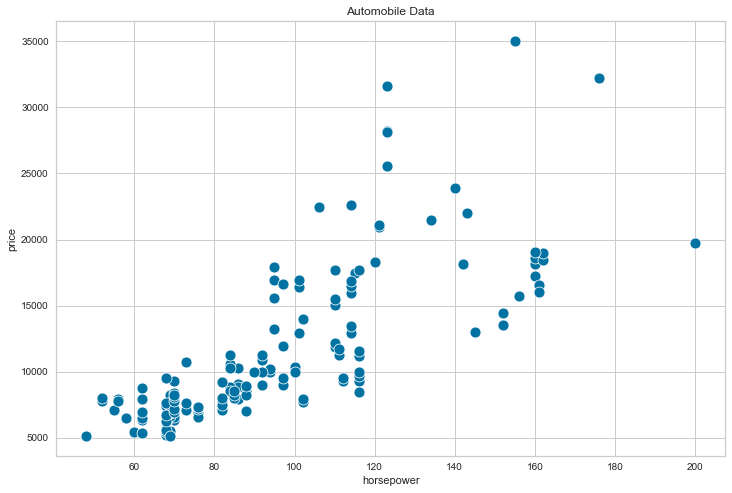

In [112]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='horsepower', y='price',
               data=automobile_data, s=120)

plt.title('Automobile Data')

plt.show()

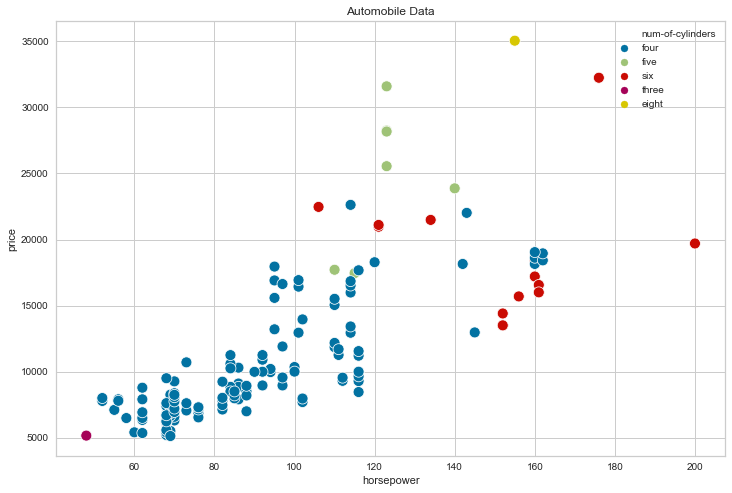

In [113]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='horsepower', y='price',
               data=automobile_data,
               hue='num-of-cylinders', s=120)

plt.title('Automobile Data')

plt.show()

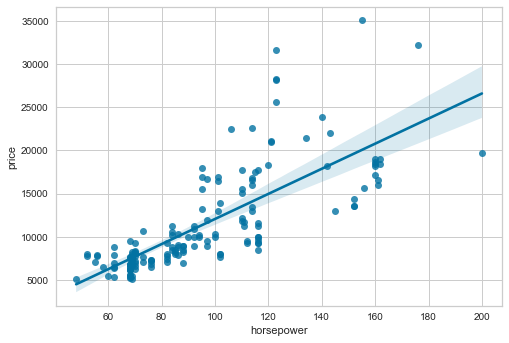

In [114]:
sns.regplot(x='horsepower', y='price',
            data=automobile_data)

plt.show()

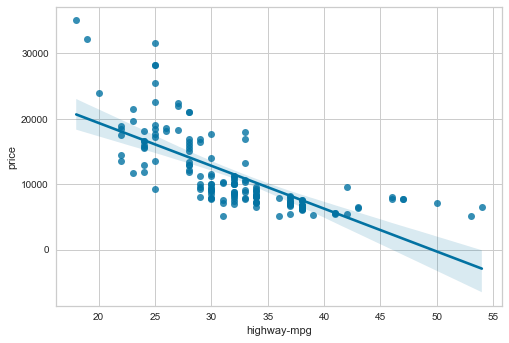

In [115]:
sns.regplot(x='highway-mpg', y='price',
            data=automobile_data)

plt.show()

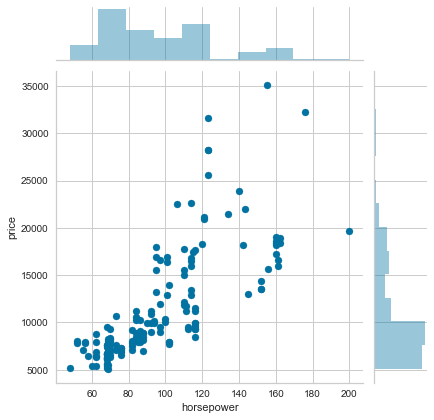

In [116]:
sns.jointplot(x='horsepower', y='price',
            data=automobile_data)

plt.show()

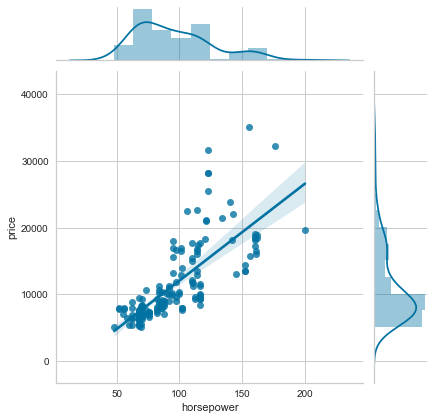

In [117]:
sns.jointplot(x='horsepower', y='price',
            data=automobile_data, kind='reg')

plt.show()

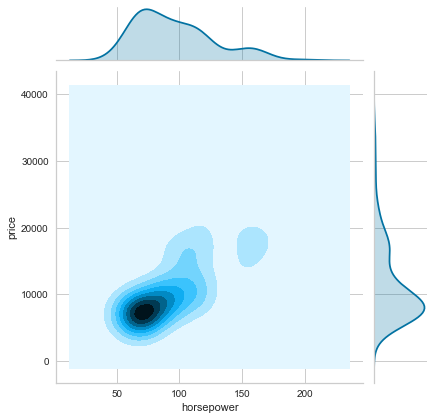

In [118]:
sns.jointplot(x='horsepower', y='price',
            data=automobile_data, kind='kde')

plt.show()

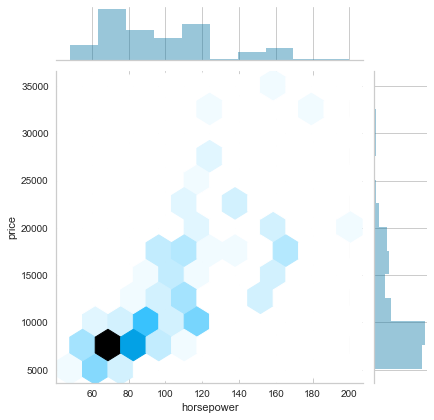

In [119]:
sns.jointplot(x='horsepower', y='price',
            data=automobile_data, kind='hex')

plt.show()

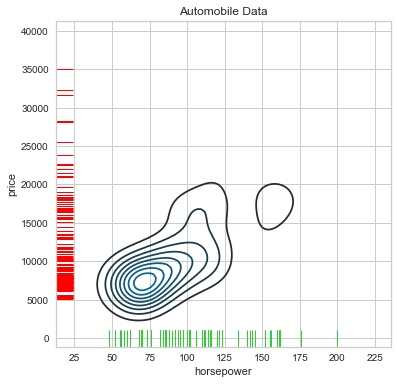

In [120]:
f, ax = plt.subplots(figsize=(6, 6))

sns.kdeplot(automobile_data['horsepower'], automobile_data['price'], ax=ax)

sns.rugplot(automobile_data['horsepower'], color='limegreen', ax=ax)
sns.rugplot(automobile_data['price'], color='red', vertical=True, ax=ax)

plt.title('Automobile Data')

plt.show()

### Exploring Continuous and Categorical Relationships

In [121]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
tips_data = pd.read_csv('datasets/tips.csv')

tips_data.sample(10)

,total_bill,tip,sex,smoker,day,time,size
20,17.92,4.08,Male,No,Sat,Dinner,2
103,22.42,3.48,Female,Yes,Sat,Dinner,2
85,34.83,5.17,Female,No,Thur,Lunch,4
144,16.43,2.30,Female,No,Thur,Lunch,2
116,29.93,5.07,Male,No,Sun,Dinner,4
175,32.90,3.11,Male,Yes,Sun,Dinner,2
165,24.52,3.48,Male,No,Sun,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
129,22.82,2.18,Male,No,Thur,Lunch,3
141,34.30,6.70,Male,No,Thur,Lunch,6


In [123]:
tips_data.shape

(244, 7)

In [124]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [125]:
tips_data.groupby(by='time').mean()

,total_bill,tip,size
time,,,
Dinner,20.797159,3.102670,2.630682
Lunch,17.168676,2.728088,2.411765


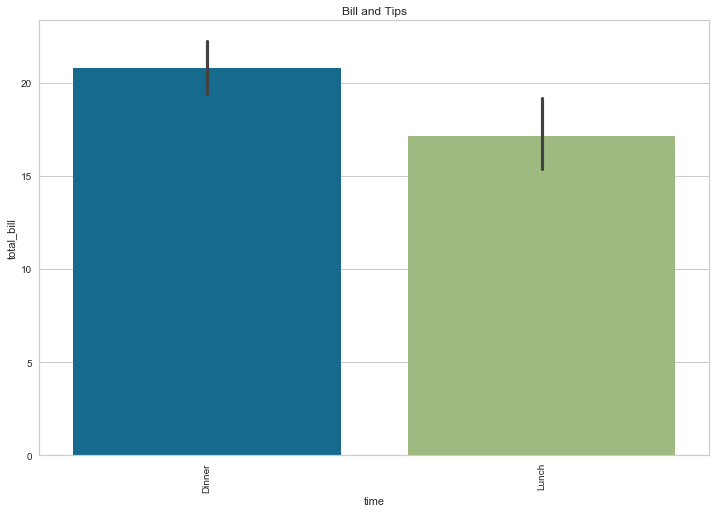

In [126]:
plt.figure(figsize=(12, 8))

sns.barplot(x='time', y='total_bill', data=tips_data)

plt.title('Bill and Tips')
plt.xticks(rotation=90)

plt.show()

In [127]:
mean = tips_data['tip'].mean()

mean

2.9982786885245902

In [128]:
tips_data['above average'] = (tips_data['tip'] - mean) > 0

tips_data[['tip', 'above average']].head(5)

,tip,above average
0,1.01,False
1,1.66,False
2,3.50,True
3,3.31,True
4,3.61,True


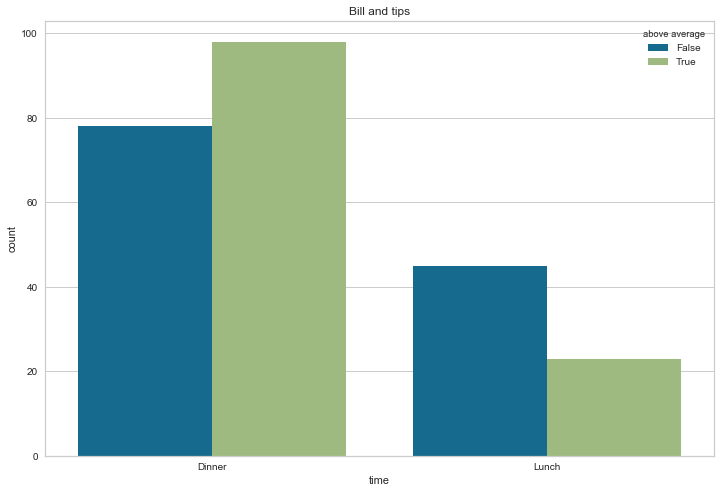

In [129]:
plt.figure(figsize=(12, 8))

sns.countplot('time',
              hue='above average',
              data=tips_data,
              order = tips_data['time'].value_counts().index)

plt.title('Bill and tips')

plt.show()

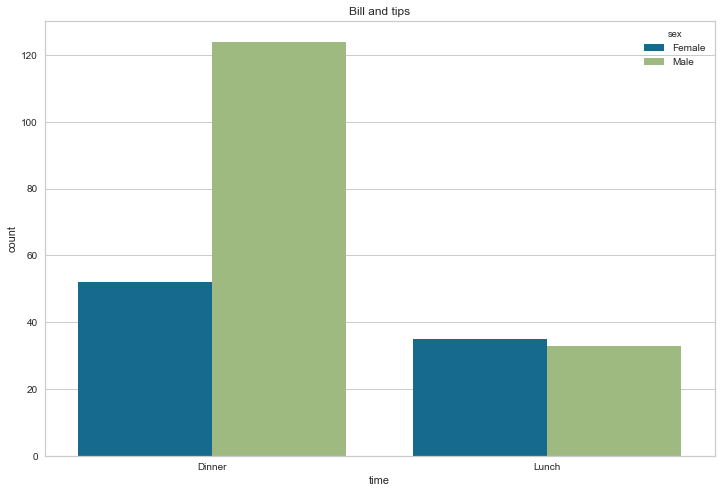

In [130]:
plt.figure(figsize=(12, 8))

sns.countplot('time',
              hue='sex',
              data=tips_data,
              order = tips_data['time'].value_counts().index)

plt.title('Bill and tips')

plt.show()

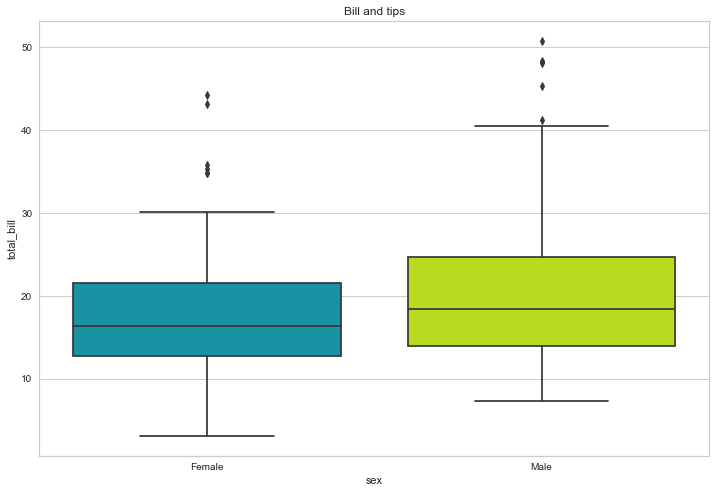

In [131]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='sex',
            y='total_bill',
            data=tips_data,
            palette='nipy_spectral')

plt.title('Bill and tips')

plt.show()

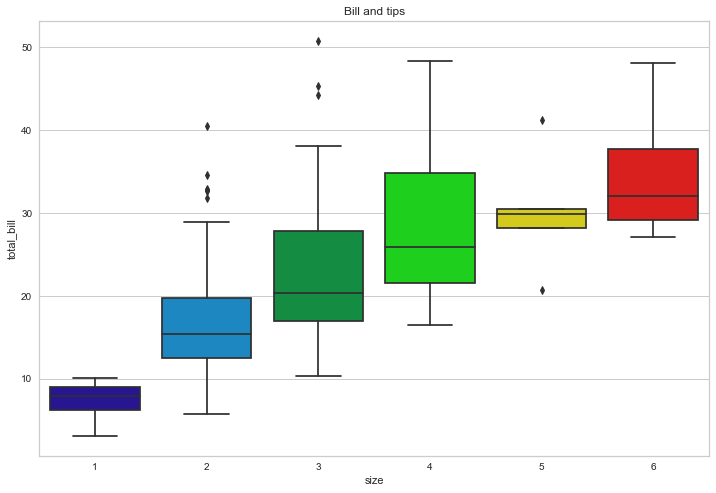

In [132]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='size',
            y='total_bill',
            data=tips_data,
            palette='nipy_spectral')

plt.title('Bill and tips')

plt.show()

<Figure size 864x576 with 0 Axes>

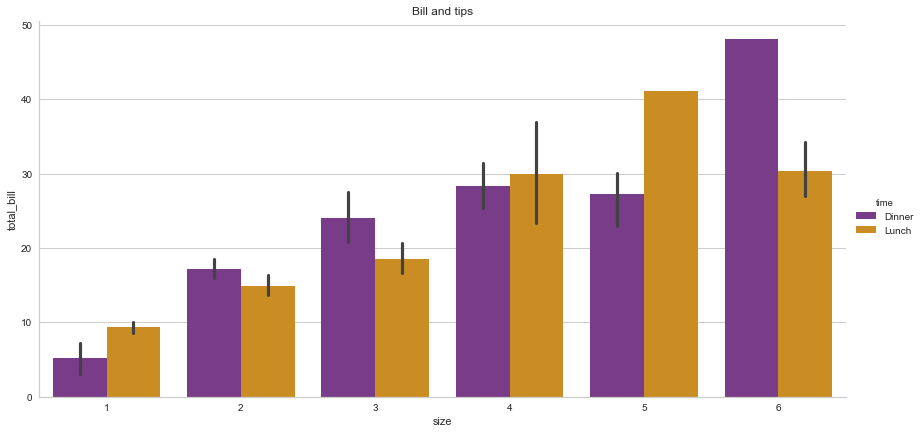

In [133]:
plt.figure(figsize=(12, 8))

sns.catplot(x='size',
            y='total_bill',
            hue='time',
            data=tips_data,
            kind='bar', height=6, aspect=2,
            palette='CMRmap')

plt.title('Bill and tips')

plt.show()

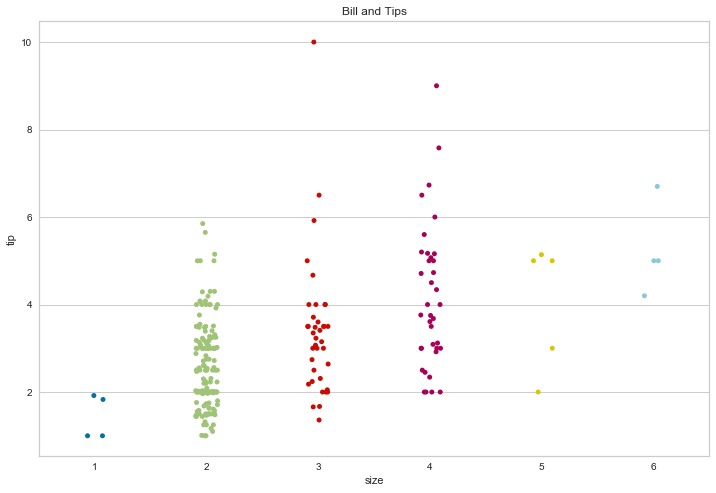

In [134]:
plt.figure(figsize=(12, 8))

sns.stripplot(x='size',
              y='tip',
              data=tips_data)

plt.title('Bill and Tips')
plt.show()

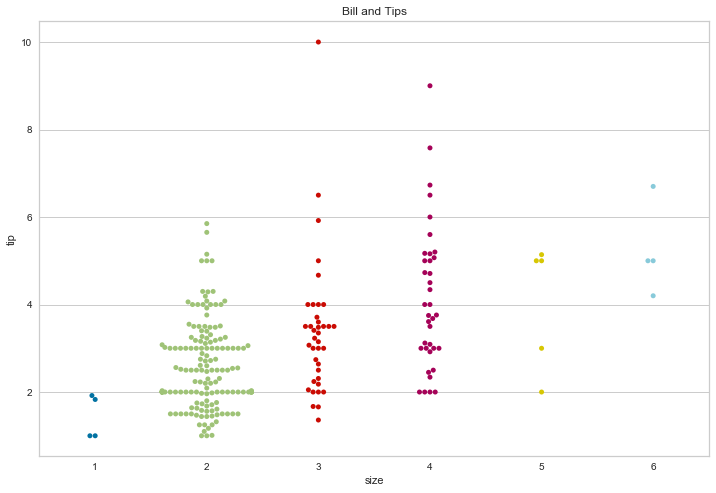

In [135]:
plt.figure(figsize=(12, 8))

sns.swarmplot(x='size',
              y='tip',
              data=tips_data)

plt.title('Bill and Tips')
plt.show()

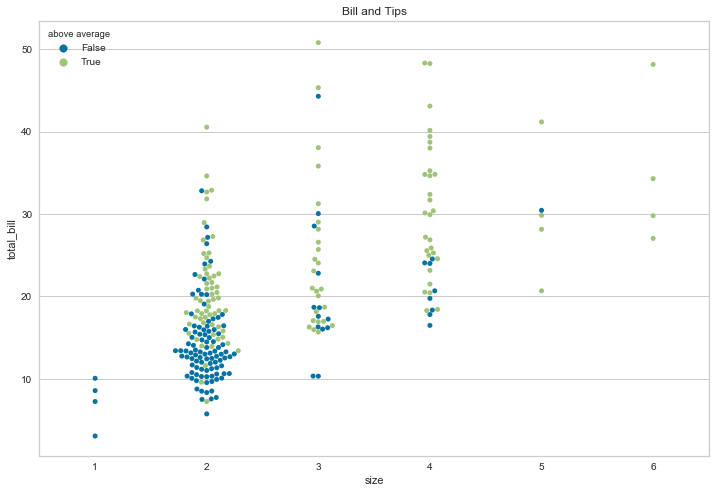

In [136]:
plt.figure(figsize=(12, 8))

sns.swarmplot(x='size',
              y='total_bill',
              hue='above average',
              data=tips_data)

plt.title('Bill and Tips')
plt.show()

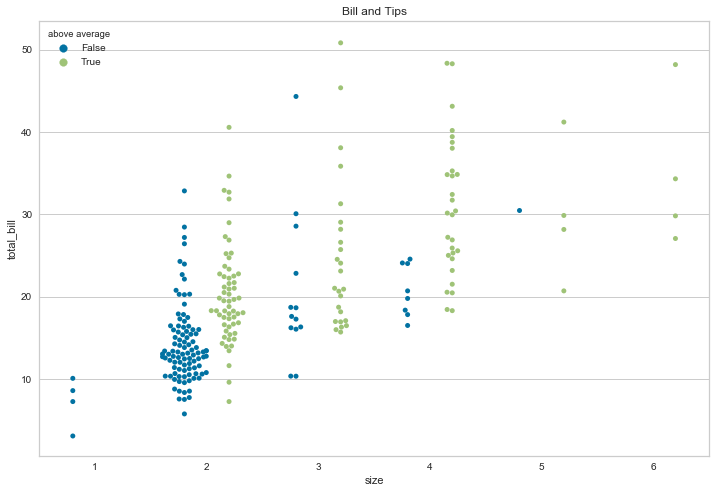

In [137]:
plt.figure(figsize=(12, 8))

sns.swarmplot(x='size',
              y='total_bill',
              hue='above average',
              data=tips_data, dodge=True)

plt.title('Bill and Tips')
plt.show()

### Pairwise Relationships

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
automobile_data_processed = pd.read_csv('datasets/automobile_data_processed.csv')

automobile_data_processed.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
91,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110.0,5250.0,21,28,11850.0
83,0,161.0,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.00,142.0,5600.0,18,24,18150.0
11,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572.0
138,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.30,161.0,5200.0,19,24,15998.0
44,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.50,123.0,4350.0,22,25,25552.0


In [140]:
automobile_subset = automobile_data_processed[['horsepower', 'city-mpg',
                                               'highway-mpg', 'price']]

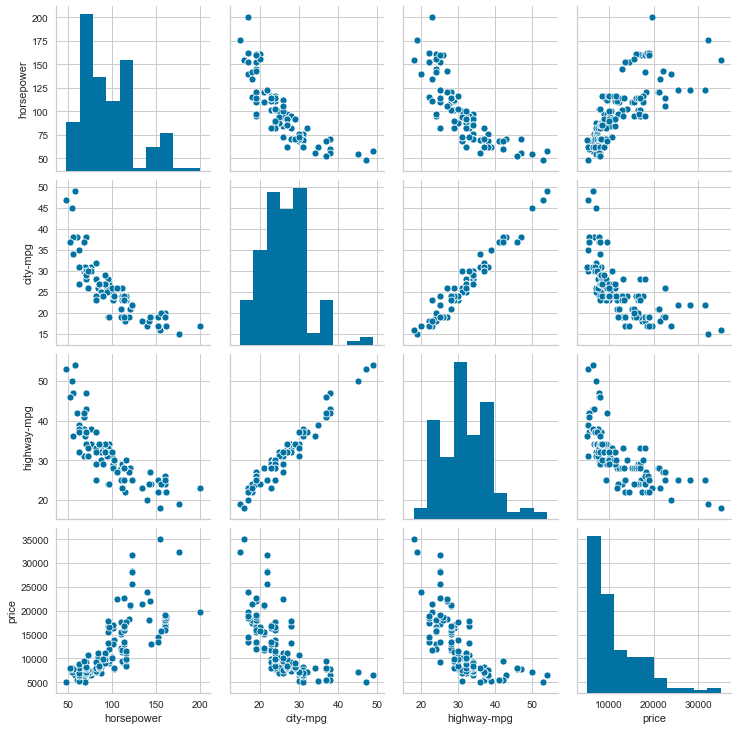

In [141]:
sns.pairplot(automobile_subset)

plt.show()

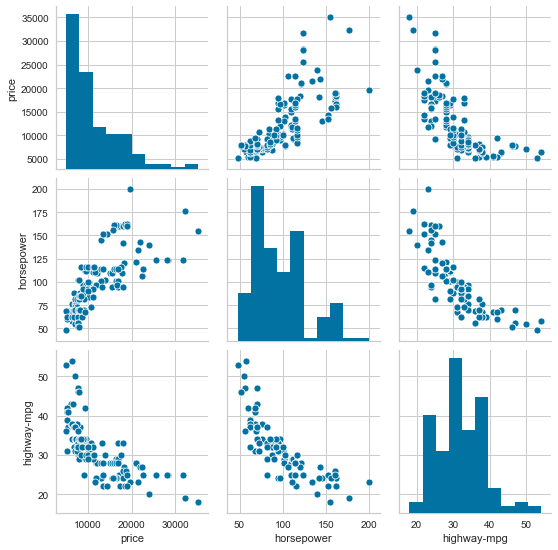

In [142]:
sns.pairplot(automobile_data_processed,
             vars=['price', 'horsepower', 'highway-mpg'])

plt.show()

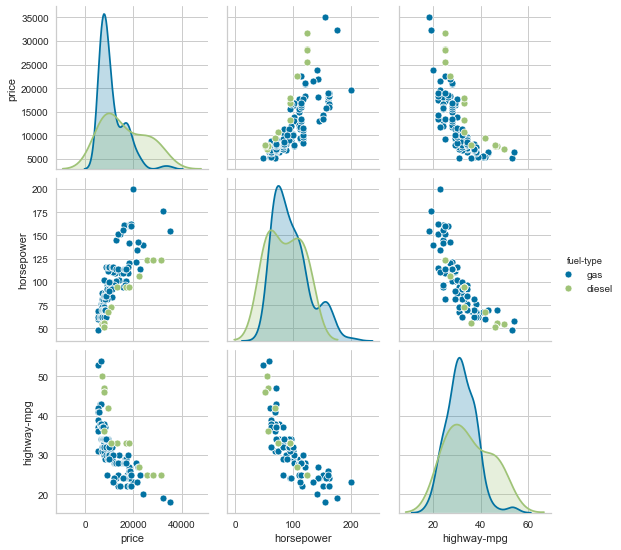

In [143]:
sns.pairplot(automobile_data_processed,
             vars=['price', 'horsepower', 'highway-mpg'],
             hue='fuel-type')

plt.show()

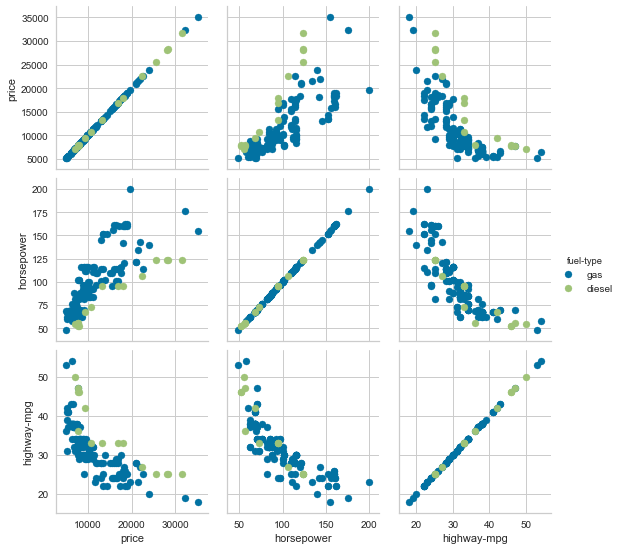

In [144]:
g = sns.PairGrid(automobile_data_processed,
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map(plt.scatter)

g.add_legend()

plt.show()

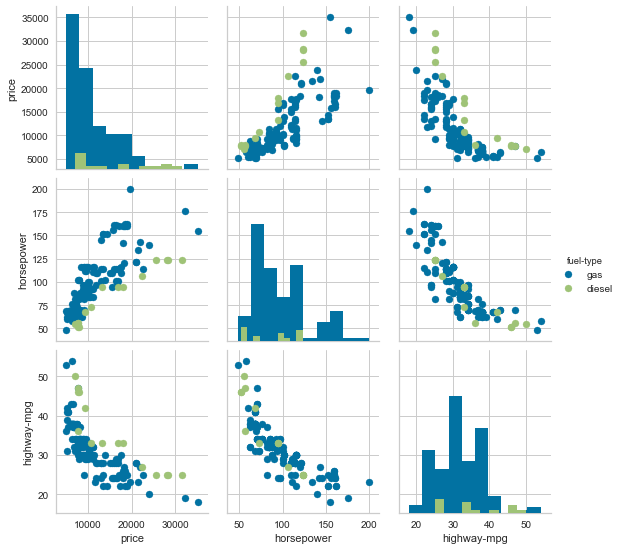

In [145]:
g = sns.PairGrid(automobile_data_processed,
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

g.add_legend()

plt.show()

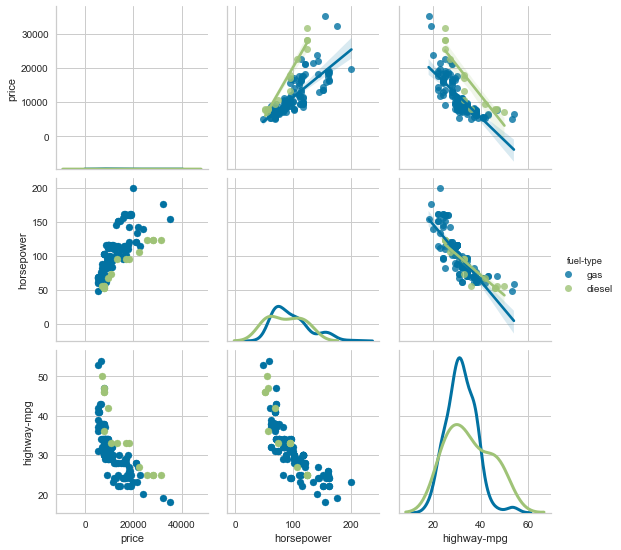

In [146]:
g = sns.PairGrid(automobile_data_processed,
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map_lower(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.map_upper(sns.regplot)

g.add_legend()

plt.show()

In [147]:
automobile_corr = automobile_data_processed[['engine-size', 'horsepower',
                                             'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].corr()

automobile_corr

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
horsepower,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
peak-rpm,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
city-mpg,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
highway-mpg,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
price,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


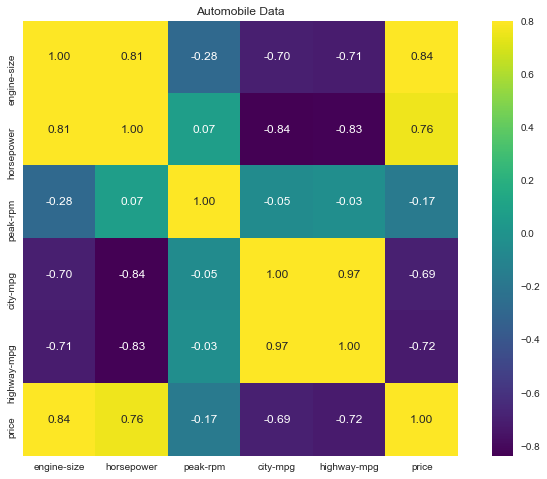

In [148]:
plt.figure(figsize=(12, 8))

sns.heatmap(automobile_corr, vmax=.8, square=True,
            annot=True, fmt='.2f', cmap = 'viridis')

plt.title('Automobile Data')

plt.show()

### Visualizing Multiple Relationships with Facets

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
automobile_data_processed = pd.read_csv('datasets/automobile_data_processed.csv')

automobile_data_processed.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
143,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,8195.0
78,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0
99,2,83.0,subaru,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73.0,4400.0,26,31,7603.0
101,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.5,82.0,4400.0,28,33,7775.0
138,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998.0


<Figure size 1080x720 with 0 Axes>

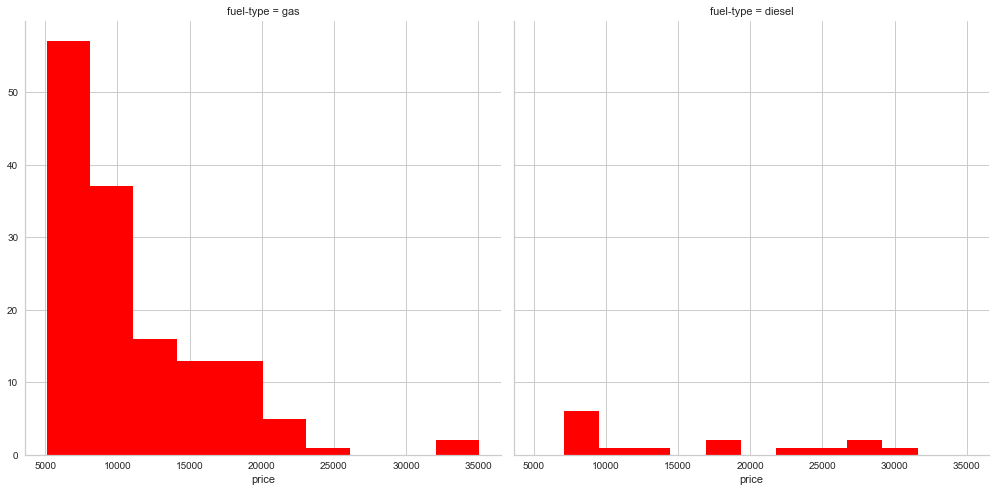

In [151]:
plt.figure(figsize=(15, 10))

fg = sns.FacetGrid(automobile_data_processed,
                   col='fuel-type',
                   height=7, aspect=1)

fg.map(plt.hist, 'price', color='red')

plt.show()

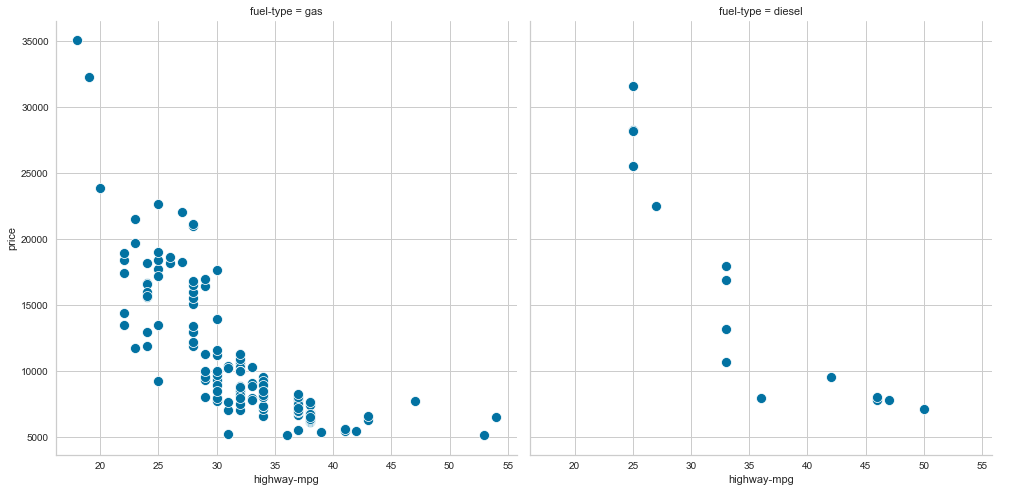

In [152]:
fg = sns.FacetGrid(automobile_data_processed,
                  col='fuel-type',
                  height=7, aspect=1)

fg.map(sns.scatterplot, 'highway-mpg', 'price', s=100)

fg.add_legend()

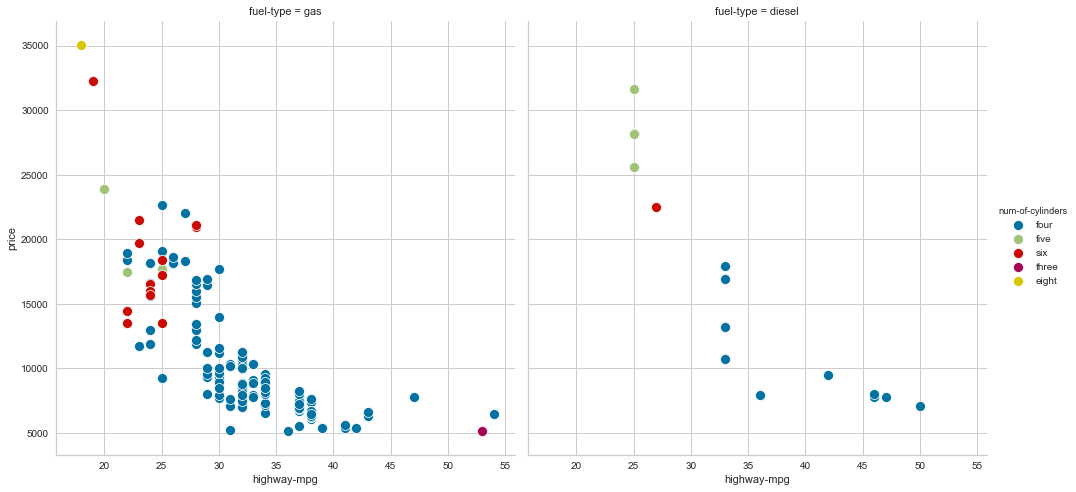

In [153]:
fg = sns.FacetGrid(automobile_data_processed,
                  col='fuel-type',
                  hue='num-of-cylinders',
                  height=7, aspect=1)

fg.map(sns.scatterplot, 'highway-mpg', 'price', s=100)

fg.add_legend()

In [154]:
tips_data = pd.read_csv('datasets/tips.csv')

tips_data.sample(10)

,total_bill,tip,sex,smoker,day,time,size
10,10.27,1.71,Male,No,Sun,Dinner,2
141,34.30,6.70,Male,No,Thur,Lunch,6
30,9.55,1.45,Male,No,Sat,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2
118,12.43,1.80,Female,No,Thur,Lunch,2
32,15.06,3.00,Female,No,Sat,Dinner,2
132,11.17,1.50,Female,No,Thur,Lunch,2
120,11.69,2.31,Male,No,Thur,Lunch,2
37,16.93,3.07,Female,No,Sat,Dinner,3
216,28.15,3.00,Male,Yes,Sat,Dinner,5


<Figure size 864x720 with 0 Axes>

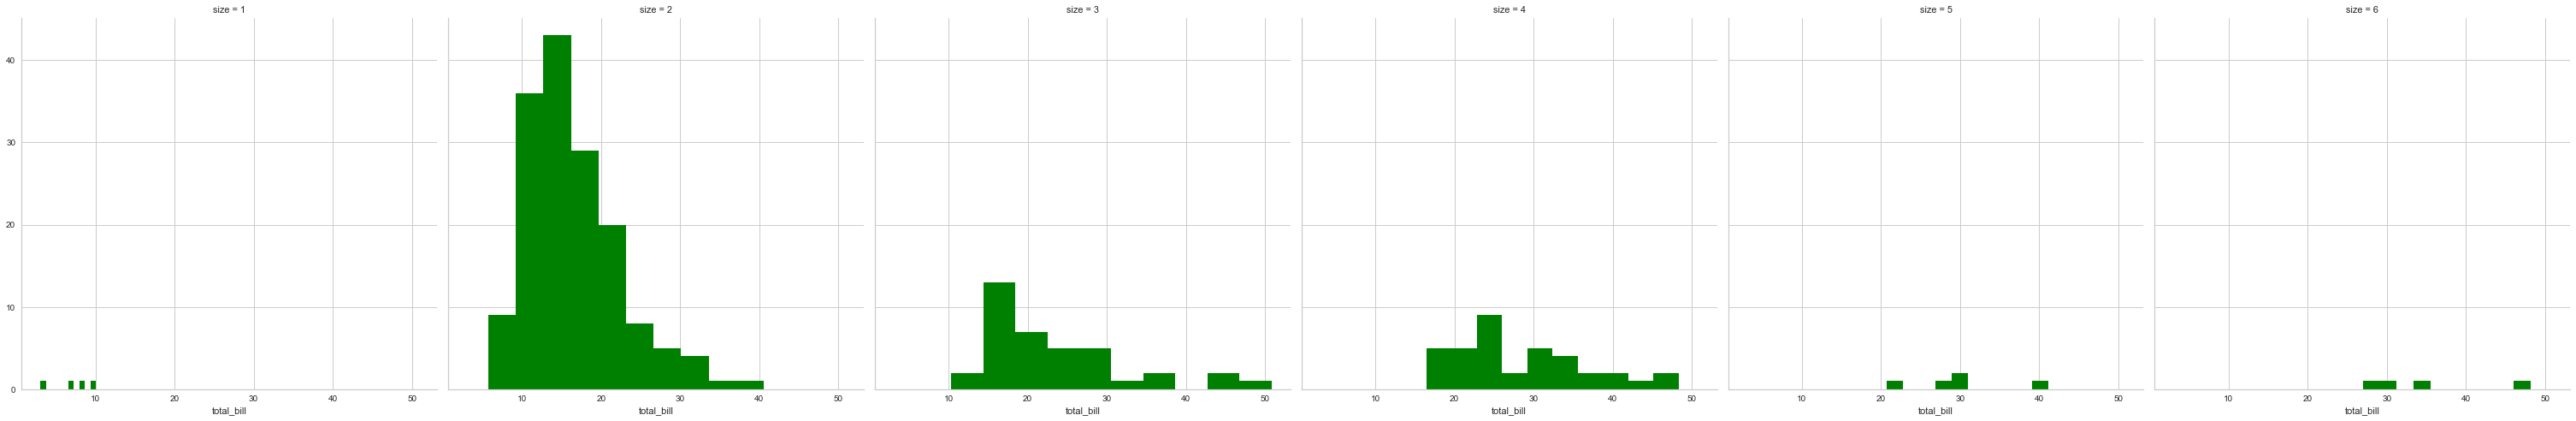

In [155]:
plt.figure(figsize=(12, 10))

fg = sns.FacetGrid(tips_data,
                  col='size',
                  height=7, aspect=1)

fg.map(plt.hist, 'total_bill', color='green')

plt.show()

In [156]:
group_size_values = np.sort(tips_data['size'].unique())

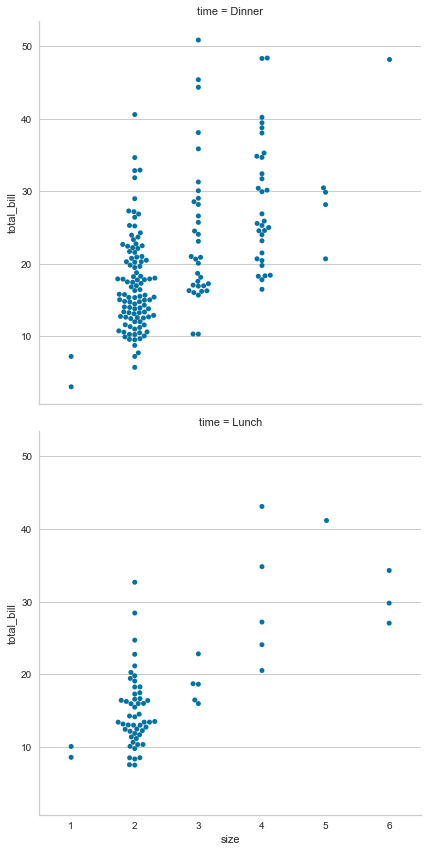

In [157]:
fg = sns.FacetGrid(tips_data,
                  row='time',
                  height=6, aspect=1)

fg.map(sns.swarmplot,
      'size',
      'total_bill',
      order=group_size_values)

fg.add_legend()

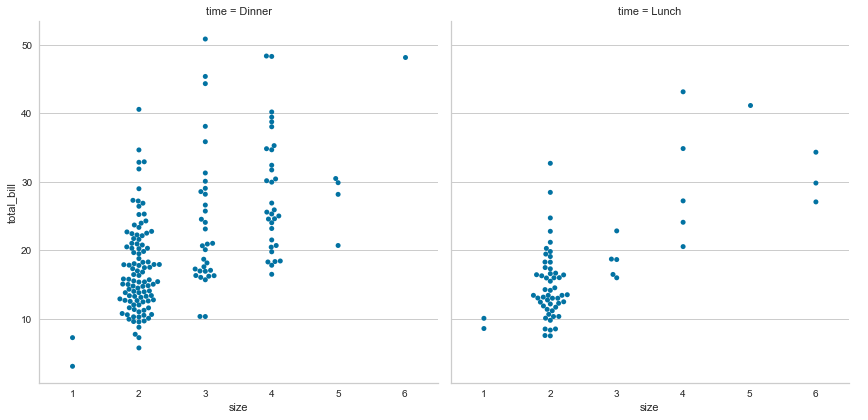

In [158]:
fg = sns.FacetGrid(tips_data,
                  col='time',
                  height=6, aspect=1)

fg.map(sns.swarmplot,
      'size',
      'total_bill',
      order=group_size_values)

fg.add_legend()

### Using Interactive Visualizations to Explore Relationships in Data

### Interactive Visualizations for Financial Data Using Plotly

In [245]:
import plotly

plotly.__version__

'4.5.4'

In [246]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [247]:
nifty_data = pd.read_csv('datasets/NSEI.csv')

nifty_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000,10792.500000,300400.0
1,2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000,10672.250000,277600.0
2,2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609,10727.349609,287700.0
3,2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805,10771.799805,261300.0
4,2019-01-08,10786.250000,10818.450195,10733.250000,10802.150391,10802.150391,269400.0


In [248]:
nifty_data.shape

(162, 7)

In [249]:
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])

nifty_data.drop(['Adj Close', 'Volume'], axis=1, inplace=True)

In [250]:
nifty_data.isnull().sum()

Date     0
Open     1
High     1
Low      1
Close    1
dtype: int64

In [251]:
nifty_data = nifty_data.dropna(how='any', axis=0)

nifty_data.shape

(161, 5)

In [252]:
trace = go.Scatter(x = nifty_data['Date'],
                   y = nifty_data['Close'],
                   mode = 'markers',
                   marker = dict(size= 7,
                                 color=nifty_data['Close'],
                                 colorscale='Rainbow',
                                 showscale=True,
                                 opacity= 0.5),
                   text = nifty_data['Close'])

In [253]:
data = [trace]

layout = go.Layout(title= 'Stocks',
                   hovermode= 'closest',
                   xaxis= dict(title= 'Date'),
                   yaxis=dict(title= 'Close'))

In [254]:
fig = go.Figure(data=data,
                layout=layout)

In [255]:
offline.iplot(fig)

In [256]:
nifty_data['Month'] = nifty_data['Date'].dt.month

nifty_data.head()

,Date,Open,High,Low,Close,Month
0,2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000,1
1,2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000,1
2,2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609,1
3,2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805,1
4,2019-01-08,10786.250000,10818.450195,10733.250000,10802.150391,1


In [257]:
trace = go.Box(x = nifty_data['Month'],
               y = nifty_data['Close'])

data = [trace]

offline.iplot(data)

In [258]:
trace = go.Candlestick(x=nifty_data.Date,
                       open=nifty_data.Open,
                       high=nifty_data.High,
                       low=nifty_data.Low,
                       close=nifty_data.Close)

data = [trace]

layout = go.Layout(title= 'Stocks',
                   hovermode= 'closest',
                   xaxis= dict(title= 'Date'),
                   yaxis= dict(title= 'Close'))

fig = go.Figure(data=data,
                layout=layout)

offline.iplot(fig)

### Geographical Plots Using Bubble Maps

In [259]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [34]:
trace = dict (type = 'scattergeo',
             
              lon = [-87.6, -117.1, -120.74, 0],
              lat = [41.8, 32.7, 47.75, 0],
             
              marker = dict(size=10),
              mode = 'markers')

data = [trace]

layout = dict(showlegend = False,
              geo = dict(showland = True))

fig = dict(data = data,
           layout = layout)

offline.iplot(fig)

In [35]:
parks_data = pd.read_csv('datasets/parks.csv')

parks_data.head(5)

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [36]:
parks_data.describe()

,Acres,Latitude,Longitude
count,5.600000e+01,56.000000,56.000000
mean,9.279291e+05,41.233929,-113.234821
std,1.709258e+06,10.908831,22.440287
min,5.550000e+03,19.380000,-159.280000
25%,6.901050e+04,35.527500,-121.570000
50%,2.387645e+05,38.550000,-110.985000
75%,8.173602e+05,46.880000,-103.400000
max,8.323148e+06,67.780000,-68.210000


In [37]:
parks_data.shape

(56, 6)

In [38]:
trace = dict(type = 'scattergeo',
            
             lat = parks_data['Latitude'],
             lon = parks_data['Longitude'],
             
             text = parks_data['Park Name'],
            
             marker = dict (size = parks_data['Acres']/10000,
                            sizemode = 'area',
                            color = parks_data['Acres'],
                            colorscale = 'Bluered',
                            showscale = True),
             
             mode = 'markers')

In [39]:
data = [trace]

layout = dict(title = 'National Parks', 
              showlegend = False, 
              
              geo = dict(showland = True,
                         landcolor = 'skyblue'))

In [40]:
fig = dict(data = data,
           layout = layout)

offline.iplot(fig)